#### Purwadhika JCDS-2304
#### M02 - Capstone Project - SaaS Sales
#### Erwin Surya

List of Contents:  

1. Background  
2. Problem Statement  
3. Data Processing  
    3.1. Data Importing  
    3.2. Data Understanding  
    3.3. Data Cleaning  
    3.4. Data Preparation  
4. Data Analysis  
    4.1. Financial Analysis  
        4.1.1. Region Review  
        4.1.2. Subregion Review  
        4.1.3. Country Review  
        4.1.4. Segment Review  
            4.1.4.1. France Segment Review  
            4.1.4.2. Spain Segment Review (France Antithesis)  
            4.1.4.3. UK Segment Review (Region Benchmark)  
            4.1.4.4. US Segment Review (Global Benckmark)  
        4.1.5. Customer Review  
            4.1.5.1. France Customer Review  
            4.1.5.2. Spain Customer Review (France Antithesis)  
            4.1.5.3. UK Customer Review (Region Benchmark)  
            4.1.5.4. US Customer Review (Global Benckmark)  
        4.1.6. Compared Country Summary  
    4.2. RFM Analysis  
        4.2.1. Recency Calculation  
        4.2.2. Frequency Calculation  
        4.2.3. Monetary Calculation  
        4.2.4. Merging  
        4.2.5. Ranking & Normalizing  
        4.2.6. Scoring & Rating  
        4.2.7. Visualizing   
5. Conclusion  
6. Recomendations  

## 1. Background
Sebuah perusahaan global SaaS (Software as a Service) menjual dan memasarkan software ke perusahaan lain atau secara B2B (Business-to-Business). Mereka beroperasi di 48 negara yang terbagi ke dalam 3 region dan 12 subregion.

## 2. Problem Statement
Top level management sedang meninjau ulang strategi pemasaran. Secara global mereka merasa sedang doing well dengan financial performance saat ini, akan tetapi mereka juga menyadari kemungkinan adanya permasalahan laten besar yang belum terdeteksi karena dampaknya baru bisa dirasakan di tahun-tahun mendatang.

Mereka meminta data analyst eksternal untuk mencari tahu apakah perusahaan ini menyimpan potensi permasalahan laten tersebut.

## 3. Data Processing
Untuk menjawab pertanyaan di atas, kita akan menganalisa data penjualan yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1dlpJfgvs8P_IyXqWB4WrNwk91fx0XAzU?usp=sharing). 

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

## 3.1. Data Importing

Dataset ini berisi semua informasi terkait penjualan, dari row ID hingga profit, di mana totalnya ada 19 kolom, yaitu:  

1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

Berikut 5 baris teratas dan terbawah dari dataset tersebut.

In [158]:
df = pd.read_csv("SaaS-Sales.csv")
df

Row ID          Order ID  Order Date  Date Key       Contact Name  \
0          1  EMEA-2022-152156   11/9/2022  20221109        Nathan Bell   
1          2  EMEA-2022-152156   11/9/2022  20221109        Nathan Bell   
2          3  AMER-2022-138688   6/13/2022  20220613     Deirdre Bailey   
3          4  EMEA-2021-108966  10/11/2021  20211011         Zoe Hodges   
4          5  EMEA-2021-108966  10/11/2021  20211011         Zoe Hodges   
...      ...               ...         ...       ...                ...   
9989    9990  EMEA-2020-110422   1/22/2020  20200122          Dan Allan   
9990    9991  AMER-2023-121258   2/27/2023  20230227  Anthony Sanderson   
9991    9992  AMER-2023-121258   2/27/2023  20230227  Anthony Sanderson   
9992    9993  AMER-2023-121258   2/27/2023  20230227  Anthony Sanderson   
9993    9994  AMER-2023-119914    5/5/2023  20230505   Jasmine Springer   

            Country           City Region Subregion           Customer  \
0           Ireland         Dublin   EMEA      UKIR            Chevron   
1           Ireland         Dublin   EMEA      UKIR            Chevron   
2     United States  New York City   AMER     NAMER        Phillips 66   
3           Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4           Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
...             ...            ...    ...       ...                ...   
9989        Germany        Hamburg   EMEA   EU-WEST  Johnson & Johnson   
9990  United States      Milwaukee   AMER     NAMER   American Express   
9991  United States      Milwaukee   AMER     NAMER   American Express   
9992  United States      Milwaukee   AMER     NAMER   American Express   
9993  United States         Dallas   AMER     NAMER            Comcast   

      Customer ID        Industry    Segment                 Product  \
0            1017          Energy        SMB         Marketing Suite   
1            1017          Energy        SMB              FinanceHub   
2            1056          Energy  Strategic              FinanceHub   
3            1031          Energy        SMB          ContactMatcher   
4            1031          Energy        SMB  Marketing Suite - Gold   
...           ...             ...        ...                     ...   
9989         1055      Healthcare        SMB     SaaS Connector Pack   
9990         1005         Finance        SMB     SaaS Connector Pack   
9991         1005         Finance        SMB          Site Analytics   
9992         1005         Finance        SMB                 Support   
9993         1022  Communications        SMB                 OneView   

         License     Sales  Quantity  Discount    Profit  
0     16GRM07R1K  261.9600         2      0.00   41.9136  
1     QLIW57KZUV  731.9400         3      0.00  219.5820  
2     JI6BVL70HQ   14.6200         2      0.00    6.8714  
3     DE9GJKGD44  957.5775         5      0.45 -383.0310  
4     OIF7NY23WD   22.3680         2      0.20    2.5164  
...          ...       ...       ...       ...       ...  
9989  ETHXMB5TMD   25.2480         3      0.20    4.1028  
9990  LYHOKTRY7L   91.9600         2      0.00   15.6332  
9991  I5SVMI6M88  258.5760         2      0.20   19.3932  
9992  JHLW4P6LQ2   29.6000         4      0.00   13.3200  
9993  3NTBV9B3PS  243.1600         2      0.00   72.9480  

[9994 rows x 19 columns]

## 3.2. Data Understanding

Sebelum menganalisa, kita perlu mengenal dataset terlebih dahulu. Melalui proses ini, kita akan mengetahui anomali-anomali apa saja yang terdapat di dalam dataset yang perlu ditangani.

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [160]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [161]:
df.duplicated().sum()

0

In [162]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column} : {unique_values}")

Row ID : 9994
Order ID : 5009
Order Date : 1237
Date Key : 1237
Contact Name : 793
Country : 48
City : 262
Region : 3
Subregion : 12
Customer : 99
Customer ID : 99
Industry : 10
Segment : 3
Product : 14
License : 9994
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287


In [163]:
df.describe()

Row ID      Date Key  Customer ID         Sales     Quantity  \
count  9994.000000  9.994000e+03  9994.000000   9994.000000  9994.000000   
mean   4997.500000  2.021803e+07  1049.771963    229.858001     3.789574   
std    2885.163629  1.123898e+04    29.719388    623.245101     2.225110   
min       1.000000  2.020010e+07  1001.000000      0.444000     1.000000   
25%    2499.250000  2.021052e+07  1024.000000     17.280000     2.000000   
50%    4997.500000  2.022063e+07  1049.000000     54.490000     3.000000   
75%    7495.750000  2.023052e+07  1076.000000    209.940000     5.000000   
max    9994.000000  2.023123e+07  1101.000000  22638.480000    14.000000   

          Discount       Profit  
count  9994.000000  9994.000000  
mean      0.156203    28.656896  
std       0.206452   234.260108  
min       0.000000 -6599.978000  
25%       0.000000     1.728750  
50%       0.200000     8.666500  
75%       0.200000    29.364000  
max       0.800000  8399.976000

In [164]:
df.describe(include = 'object')

Order ID Order Date   Contact Name        Country    City  \
count               9994       9994           9994           9994    9994   
unique              5009       1237            793             48     262   
top     EMEA-2023-100111   9/6/2022  Leonard Kelly  United States  London   
freq                  14         38             37           2001     922   

       Region Subregion Customer Industry Segment         Product     License  
count    9994      9994     9994     9994    9994            9994        9994  
unique      3        12       99       10       3              14        9994  
top      EMEA     NAMER  Allianz  Finance     SMB  ContactMatcher  16GRM07R1K  
freq     4219      2507      192     2127    5191            1842           1

In [165]:
pd.set_option('display.max_colwidth', 500)

listUnique = []
for col in df.columns :
    listUnique.append([col, df[col].nunique(), df[col].unique()])

tabelUnique = pd.DataFrame(data = listUnique, columns = ['Column Name', 'Number of Unique', 'Unique Samples'])
tabelUnique

Column Name  Number of Unique  \
0         Row ID              9994   
1       Order ID              5009   
2     Order Date              1237   
3       Date Key              1237   
4   Contact Name               793   
5        Country                48   
6           City               262   
7         Region                 3   
8      Subregion                12   
9       Customer                99   
10   Customer ID                99   
11      Industry                10   
12       Segment                 3   
13       Product                14   
14       License              9994   
15         Sales              5825   
16      Quantity                14   
17      Discount                12   
18        Profit              7287   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Unique Samples  
0                                                                                                         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]  
1   [EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545...  
2   [11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 1...  
3   [20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221...  
4   [Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Morrison, Claire Welch, Carol Campbell, Blake Hughes, Melanie Sharp, Luke Bower, Jonathan Ferguson, Sam Parsons, Neil Gill, Amelia Campbell, Chloe Short, Jasmine Metcalfe, Karen Mathis, Dylan Dickens, Sophie Lewis, Gavin Mitchell, Katherine Dowd, Harry Brown, Brian Dickens, Joseph Newman, Nicola Howard, Stewart Wilson, Eric McLean, Leah Clarkson, Alison Davidson, Sophie Vance, Anne Lee, Maria Dyer, ...  
5                      [Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Australia, Luxembourg, Brazil, Philippines, India, United Kingdom, Chile, Spain, South Africa

In [166]:
df.groupby(['Region', 'Subregion'])['Country'].unique().apply(lambda x: ', '.join(sorted(x))).reset_index()

Region Subregion  \
0    AMER     LATAM   
1    AMER     NAMER   
2     APJ       ANZ   
3     APJ      APAC   
4     APJ       IND   
5     APJ      JAPN   
6    EMEA        EU   
7    EMEA   EU-EAST   
8    EMEA   EU-WEST   
9    EMEA       MEA   
10   EMEA       NOR   
11   EMEA      UKIR   

                                                                                                                     Country  
0                                                                     Argentina, Brazil, Chile, Colombia, Costa Rica, Mexico  
1                                                                                                      Canada, United States  
2                                                                                                     Australia, New Zealand  
3                                                              China, Indonesia, Philippines, Singapore, South Korea, Taiwan  
4                                                                                                                      India  
5                                                                                                                      Japan  
6                                                                                                                      Italy  
7                                                                            Czech Republic, Greece, Israel, Russia, Ukraine  
8   Austria, Belgium, Croatia, Denmark, France, Germany, Iceland, Luxembourg, Netherlands, Poland, Portugal, Slovenia, Spain  
9                                                     Egypt, Qatar, Saudi Arabia, South Africa, Turkey, United Arab Emirates  
10                                                                                                   Finland, Norway, Sweden  
11                                                                                                   Ireland, United Kingdom

Secara umum, kita telah mendapatkan informasi bahwa:  

* dataset memiliki 19 kolom dan 9994 baris
* tidak ada kolom yang memiliki nilai kosong atau missing value, maupun duplikat
* kolom 'Row ID' dan 'License' berisikan nilai unik di tiap baris, sehingga tidak relevan untuk dianalisa
* kolom 'Order ID' berisikan nilai unik untuk setiap order
* kolom 'Order Date' memiliki data tipe object, padahal seharusnya tipe datetime
* kolom 'Date Key' berisikan informasi yang sama dengan tanggal di kolom 'Order Date'
* kolom 'Contact Name' berisikan nama kontak customer yang tidak relevan untuk dianalisa
* kolom 'Customer ID' berisikan nomor unik untuk setiap customer
* tidak ada kolom numerik yang memiliki nilai negatif, kecuali 'Profit'
* pengkategorian data di dalam kolom 'Region', 'Subregion', dan 'Country' sudah sesuai dengan domain knowledge

## 3.3. Data Cleaning

In [167]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [168]:
df.drop(columns = ['Row ID', 'Order ID', 'Date Key', 'Contact Name', 'Customer ID', 'License'], inplace = True)
df.head()

Order Date        Country           City Region Subregion  \
0 2022-11-09        Ireland         Dublin   EMEA      UKIR   
1 2022-11-09        Ireland         Dublin   EMEA      UKIR   
2 2022-06-13  United States  New York City   AMER     NAMER   
3 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   
4 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   

            Customer Industry    Segment                 Product     Sales  \
0            Chevron   Energy        SMB         Marketing Suite  261.9600   
1            Chevron   Energy        SMB              FinanceHub  731.9400   
2        Phillips 66   Energy  Strategic              FinanceHub   14.6200   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher  957.5775   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold   22.3680   

   Quantity  Discount    Profit  
0         2      0.00   41.9136  
1         3      0.00  219.5820  
2         2      0.00    6.8714  
3         5      0.45 -383.0310  
4         2      0.20    2.5164

Proses cleaning yang dikerjakan adalah:  

* mengubah tipe data 'Order Date' dari object menjadi datetime
* menghapus kolom-kolom yang tidak relevan untuk dianalisa, yaitu 'Row ID', 'Order ID', 'Date Key', 'Contact Name', 'Customer ID', dan 'License'

## 3.4. Data Preparation

In [169]:
df.rename(columns = {'Discount': 'Discount Rate'}, inplace = True)
df['Price AD'] = df['Sales'] / df['Quantity']
df['Price BD'] = df['Price AD'] / (1 - df['Discount Rate'])
df['Total Discount'] = (df['Price BD'] - df['Price AD']) * df['Quantity']
df['Cost'] = df['Sales'] - df['Profit']
df['Order Month'] = df['Order Date'].dt.strftime('%Y-%m')
df['Order Quarter'] = df['Order Date'].dt.to_period('Q')
df['Order Year'] = df['Order Date'].dt.year
df

Order Date        Country           City Region Subregion  \
0    2022-11-09        Ireland         Dublin   EMEA      UKIR   
1    2022-11-09        Ireland         Dublin   EMEA      UKIR   
2    2022-06-13  United States  New York City   AMER     NAMER   
3    2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   
4    2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   
...         ...            ...            ...    ...       ...   
9989 2020-01-22        Germany        Hamburg   EMEA   EU-WEST   
9990 2023-02-27  United States      Milwaukee   AMER     NAMER   
9991 2023-02-27  United States      Milwaukee   AMER     NAMER   
9992 2023-02-27  United States      Milwaukee   AMER     NAMER   
9993 2023-05-05  United States         Dallas   AMER     NAMER   

               Customer        Industry    Segment                 Product  \
0               Chevron          Energy        SMB         Marketing Suite   
1               Chevron          Energy        SMB              FinanceHub   
2           Phillips 66          Energy  Strategic              FinanceHub   
3     Royal Dutch Shell          Energy        SMB          ContactMatcher   
4     Royal Dutch Shell          Energy        SMB  Marketing Suite - Gold   
...                 ...             ...        ...                     ...   
9989  Johnson & Johnson      Healthcare        SMB     SaaS Connector Pack   
9990   American Express         Finance        SMB     SaaS Connector Pack   
9991   American Express         Finance        SMB          Site Analytics   
9992   American Express         Finance        SMB                 Support   
9993            Comcast  Communications        SMB                 OneView   

         Sales  Quantity  Discount Rate    Profit  Price AD  Price BD  \
0     261.9600         2           0.00   41.9136  130.9800    130.98   
1     731.9400         3           0.00  219.5820  243.9800    243.98   
2      14.6200         2           0.00    6.8714    7.3100      7.31   
3     957.5775         5           0.45 -383.0310  191.5155    348.21   
4      22.3680         2           0.20    2.5164   11.1840     13.98   
...        ...       ...            ...       ...       ...       ...   
9989   25.2480         3           0.20    4.1028    8.4160     10.52   
9990   91.9600         2           0.00   15.6332   45.9800     45.98   
9991  258.5760         2           0.20   19.3932  129.2880    161.61   
9992   29.6000         4           0.00   13.3200    7.4000      7.40   
9993  243.1600         2           0.00   72.9480  121.5800    121.58   

      Total Discount       Cost Order Month Order Quarter  Order Year  
0             0.0000   220.0464     2022-11        2022Q4        2022  
1             0.0000   512.3580     2022-11        2022Q4        2022  
2             0.0000     7.7486     2022-06        2022Q2        2022  
3           783.4725  1340.6085     2021-10        2021Q4        2021  
4             5.5920    19.8516     2021-10        2021Q4        2021  
...              ...        ...         ...           ...         ...  
9989          6.3120    21.1452     2020-01        2020Q1        2020  
9990          0.0000    76.3268     2023-02        2023Q1        2023  
9991         64.6440   239.1828     2023-02        2023Q1        2023  
9992          0.0000    16.2800     2023-02        2023Q1        2023  
9993          0.0000   170.2120     2023-05        2023Q2        2023  

[9994 rows x 20 columns]

In [170]:
df.to_csv('saas_sales1.csv', index = False)

Proses preparation yang dilakukan adalah menambah kolom-kolom baru untuk mempermudah analisa, yaitu: 

1. Price AD: Harga setelah diskon
2. Price BD: Harga sebelum diskon
3. Total Discount: Total diskon
4. Cost: Total Biaya
5. Order Month: Bulan penjualan
6. Order Quarter: Kuartal penjualan
7. Order Year: Tahun penjualan

Kemudian dataframe disimpan ke dalam file csv supaya bisa diakses oleh Tableau.

## 4. Data Analysis

### 4.1. Financial Analysis

Dalam financial analysis ini, kita akan memperbandingkan empat indikator, yaitu sales, profit, profit margin, dan discount ratio secara bertahap dari level region hingga level negara, kemudian dilakukan benchmarking dengan dua negara best practice UK dan US yang sudah terbukti secara konsisten mempertahankan pertumbuhan sales yang tinggi dengan tetap menjaga profitabilitasnya. Setelah itu, kita juga akan melihat discount rate yang telah diberikan ke setiap customer dalam empat tahun ini untuk memperoleh gambaran menyeluruh tentang strategi pricing yang dijalankan oleh country manager.

### 4.1.1. Region Review

In [171]:
df_region = df.groupby(['Region', 'Order Year'])[['Sales', 'Profit', 'Total Discount']].sum().reset_index()
df_region['Profit Margin'] = df_region['Profit'] / df_region['Sales']
df_region['Discount Ratio'] = df_region['Total Discount'] / df_region['Sales']

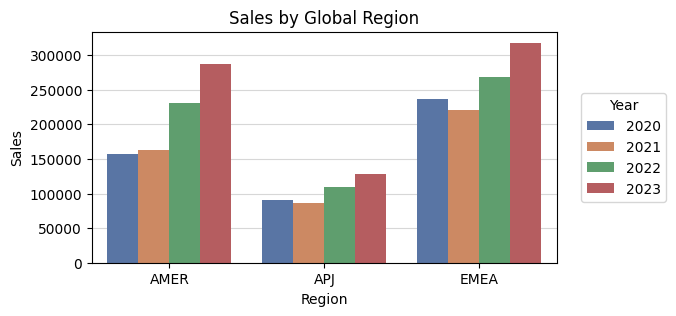

In [172]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_region, x = 'Region', y = 'Sales', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Sales by Global Region')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : secara umum ada kenaikan sales yang konsisten di semua region sejak tahun 2021, di mana EMEA selalu mencatatkan sales terbesar setiap tahunnya

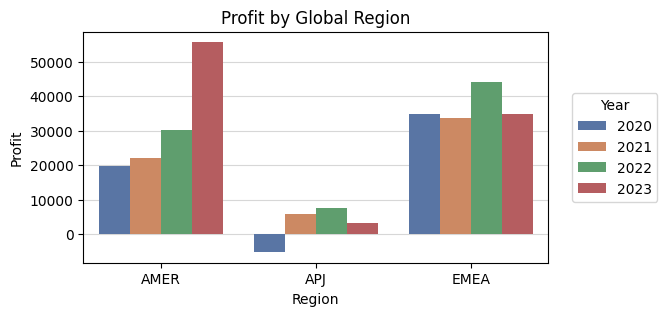

In [173]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_region, x = 'Region', y = 'Profit', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit by Global Region')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : AMER secara konsisten membukukan kenaikan profit yang signifikan (bahkan berhasil melampaui EMEA di tahun 2023), sementara kedua region lainnya justru stagnan cenderung sedikit menurun

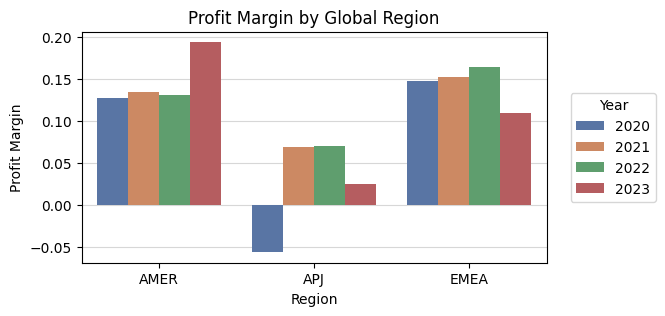

In [174]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_region, x = 'Region', y = 'Profit Margin', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit Margin by Global Region')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : sejalan dengan profit, margin AMER juga melonjak tinggi di tahun 2023 hingga hampir mencapai 2x EMEA

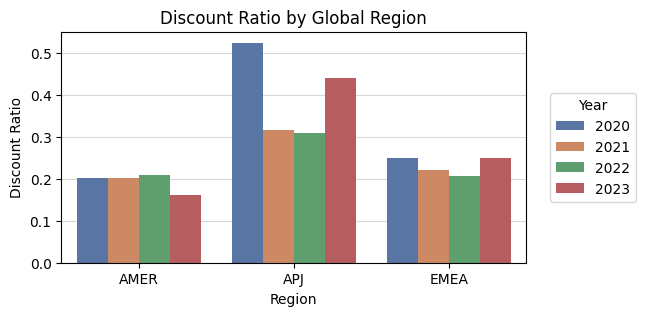

In [175]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_region, x = 'Region', y = 'Discount Ratio', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Discount Ratio by Global Region')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : APJ dan EMEA kembali mengalami kenaikan discount ratio (discount/sales) pada tahun 2023 setelah sebelumnya sempat turun dua tahun berturut-turut, sementara AMER berhasil memangkas discount ratio cukup banyak

### 4.1.2. Subregion Review

In [176]:
df_subregion = df.groupby(['Region', 'Subregion', 'Order Year'])[['Sales', 'Profit', 'Total Discount']].sum().reset_index()
df_subregion['Profit Margin'] = df_subregion['Profit'] / df_subregion['Sales']
df_subregion['Discount Ratio'] = df_subregion['Total Discount'] / df_subregion['Sales']

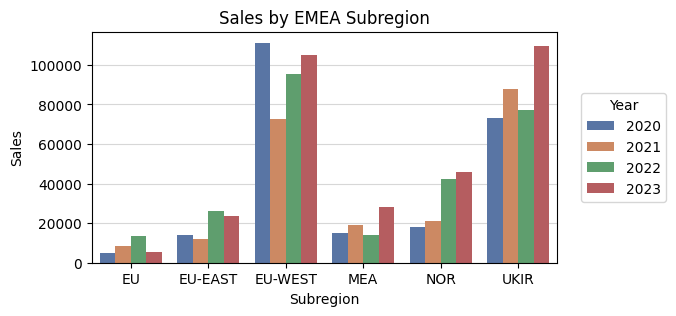

In [177]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_subregion[df_subregion['Region'] == 'EMEA'], x = 'Subregion', y = 'Sales', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Sales by EMEA Subregion')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : sales EMEA didominasi oleh dua subregion, yaitu EU-West dan UKIR, di mana UKIR secara perlahan mulai menyalip EU-West

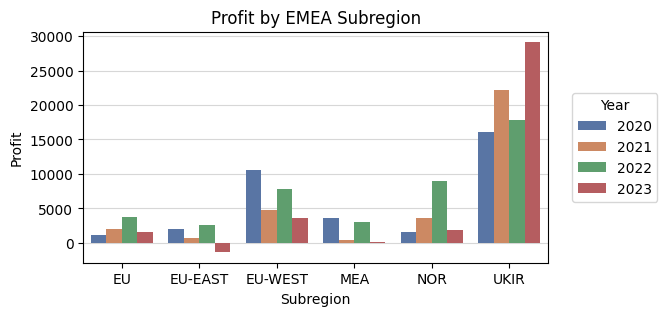

In [178]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_subregion[df_subregion['Region'] == 'EMEA'], x = 'Subregion', y = 'Profit', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit by EMEA Subregion')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : walaupun bersaing ketat di total penjualan, secara profit UKIR jauh sekali meninggalkan EU-West, puncaknya di tahun 2023 di mana profit UKIR menembus 8x EU-West

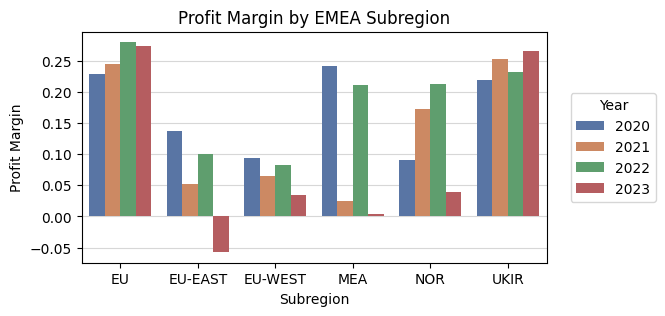

In [179]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_subregion[df_subregion['Region'] == 'EMEA'], x = 'Subregion', y = 'Profit Margin', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit Margin by EMEA Subregion')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : di region EMEA, hanya ada dua subregion yang mampu mencatatkan margin > 20% secara konsisten, yaitu EU dan UKIR

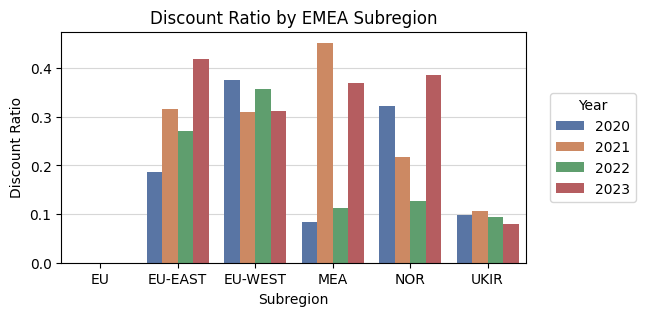

In [180]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_subregion[df_subregion['Region'] == 'EMEA'], x = 'Subregion', y = 'Discount Ratio', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Discount Ratio by EMEA Subregion')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : EU tidak memberikan discount sama sekali selama 4 tahun berturut-turut, UKIR membatasi discount ratio di level 10%, sementara EU-West justru memaksimalkannya hingga di atas 30%

### 4.1.3. Country Review

In [181]:
df_country = df.groupby(['Region', 'Subregion', 'Country', 'Order Year'])[['Sales', 'Profit', 'Total Discount']].sum().reset_index()
df_country['Profit Margin'] = df_country['Profit'] / df_country['Sales']
df_country['Discount Ratio'] = df_country['Total Discount'] / df_country['Sales']
df_country['Country'] = df_country['Country'].apply(lambda x: x[:3])

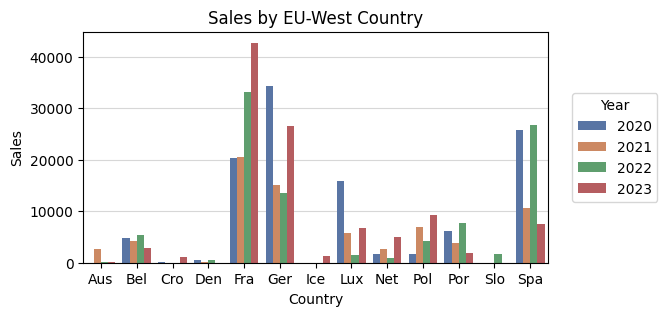

In [182]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_country[df_country['Subregion'] == 'EU-WEST'], x = 'Country', y = 'Sales', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Sales by EU-West Country')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : pada subregion EU-West ada tiga negara yang dominan, dengan urutan sebagai berikut: France, Germany, dan Spain

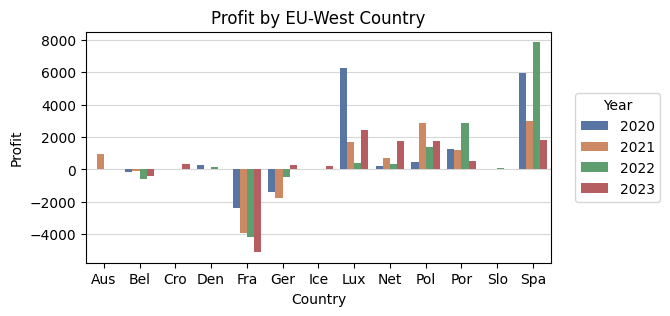

In [183]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_country[df_country['Subregion'] == 'EU-WEST'], x = 'Country', y = 'Profit', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit by EU-West Country')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : France yang secara sales adalah yang terbesar di EU-West ternyata membukukan profit negatif yang semakin memburuk dari tahun ke tahun, sementara Spain walaupun selalu positif harus tetap waspada karena profitnya jatuh sekali di 2023

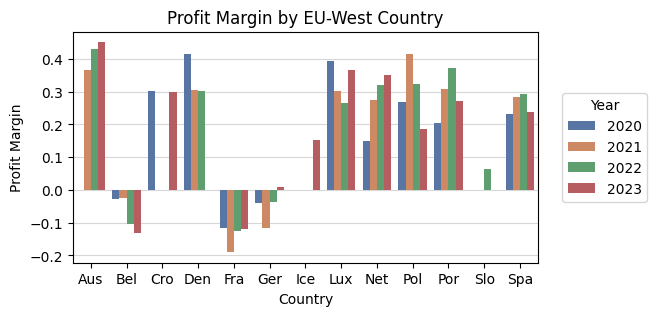

In [184]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_country[df_country['Subregion'] == 'EU-WEST'], x = 'Country', y = 'Profit Margin', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit Margin by EU-West Country')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : Luxembourg, Portugal, dan Spain adalah tiga negara di EU-West yang mampu menjaga profit margin > 20% secara konsisten selama empat tahun ini

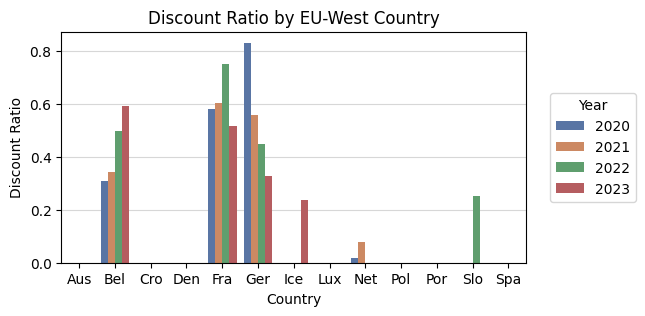

In [185]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_country[df_country['Subregion'] == 'EU-WEST'], x = 'Country', y = 'Discount Ratio', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Discount Ratio by EU-West Country')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : lebih dari separuh negara di EU-West (Austria, Croatia, Denmark, Luxembourg, Poland, Portugal, dan Spain) bertahan tidak memberikan discount sama sekali selama empat tahun berturut-turut, sementara Belgium, France, dan Germany menjalankan strategi yang berlawanan

### 4.1.4. Segment Review

In [186]:
df_segment = df.groupby(['Region', 'Subregion', 'Country', 'Segment', 'Order Year'])[['Sales', 'Profit', 'Total Discount']].sum().reset_index()
df_segment['Profit Margin'] = df_segment['Profit'] / df_segment['Sales']
df_segment['Discount Ratio'] = df_segment['Total Discount'] / df_segment['Sales']

### 4.1.4.1. France Segment Review

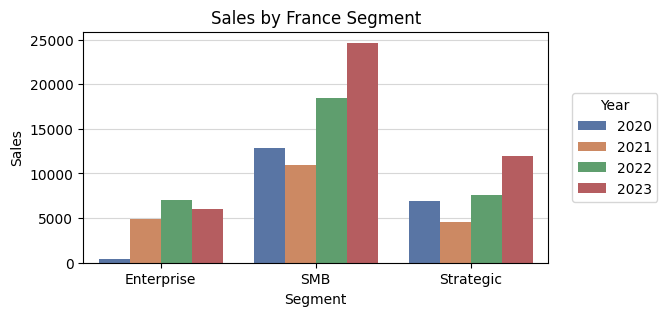

In [187]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'France'], x = 'Segment', y = 'Sales', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Sales by France Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : berdasarkan data, segmen yang mencatatkan penjualan terbesar di France adalah SMB, kemudian disusul oleh strategic dan enterprise, di mana SMB dan strategic mengalami pertumbuhan yang cukup pesat dalam tiga tahun terakhir

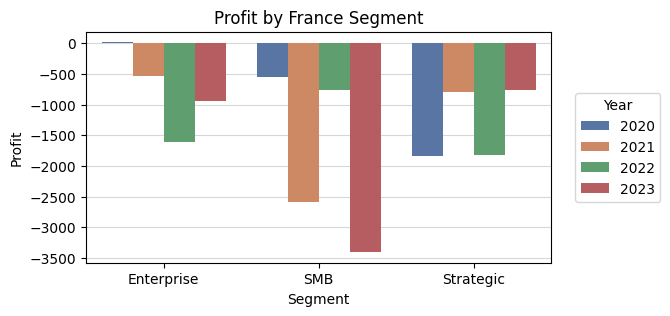

In [188]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'France'], x = 'Segment', y = 'Profit', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit by France Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : bertolak belakang dengan pertumbuhan sales, segmen SMB justru mengalami kerugian yang semakin dalam pada tahun 2023, kedua segmen lainnya juga mencatatkan profit negatif berturut-turut 

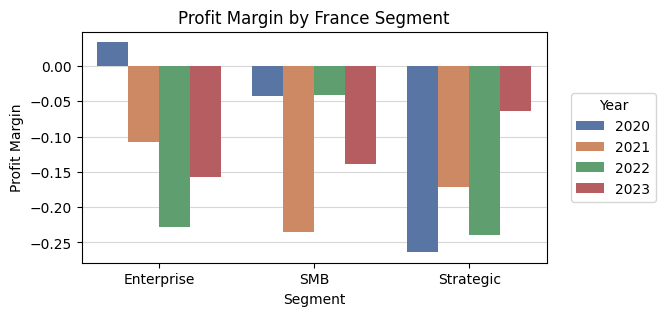

In [189]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'France'], x = 'Segment', y = 'Profit Margin', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit Margin by France Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: sejalan dengan profit yang negatif, margin juga belum menunjukkan adanya tren perbaikan

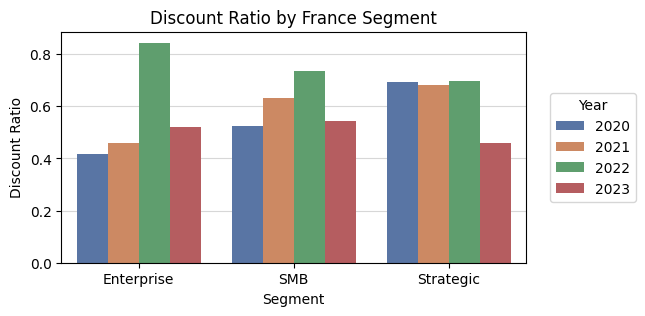

In [190]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'France'], x = 'Segment', y = 'Discount Ratio', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Discount Ratio by France Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: dari grafik ini dapat dilihat bahwa France sangat agresif dalam hal pricing, di mana mereka mempertahankan discount ratio > 40% selama empat tahun di semua segmen

### 4.1.4.2. Spain Segment Review (France Antithesis)

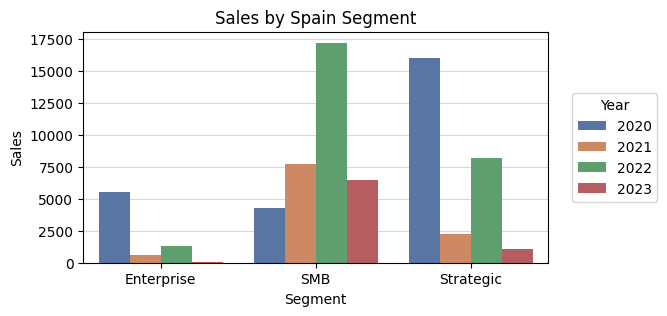

In [191]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'Spain'], x = 'Segment', y = 'Sales', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Sales by Spain Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: berlawanan dengan France, Spain cenderung mengalami penurunan dalam sales, terutama pada tahun 2023

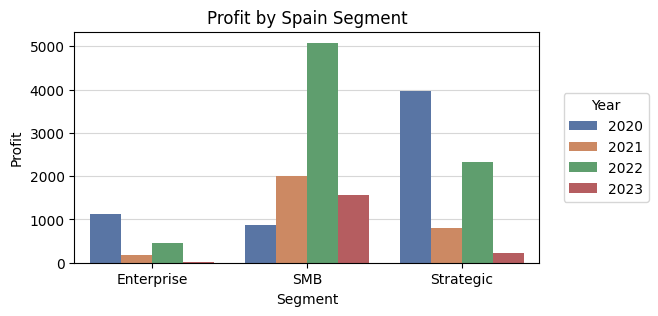

In [192]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'Spain'], x = 'Segment', y = 'Profit', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit by Spain Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: seiring dengan sales yang menurun, profit mereka pun mulai ikut tergerus di semua segmen pada 2023

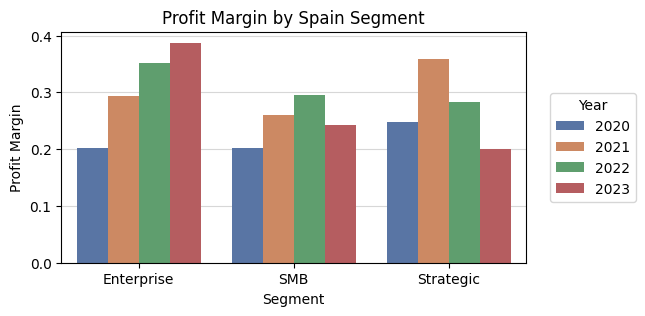

In [193]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'Spain'], x = 'Segment', y = 'Profit Margin', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit Margin by Spain Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: walaupun nominal profit menurun, Spain tetap mampu mempertahankan margin di atas level 20% selama empat tahun di semua segmen

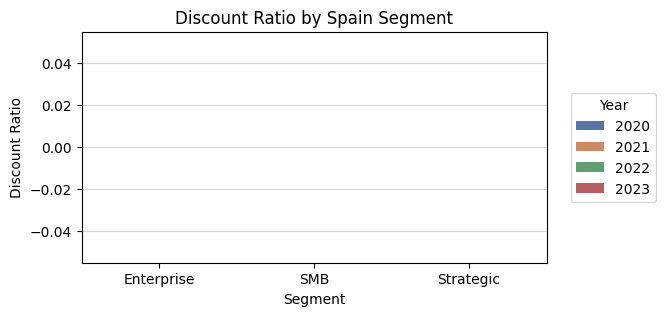

In [194]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'Spain'], x = 'Segment', y = 'Discount Ratio', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Discount Ratio by Spain Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: Spain adalah salah satu negara yang menerapkan 0% discount ratio

### 4.1.4.3. UK Segment Review (Region Benchmark)

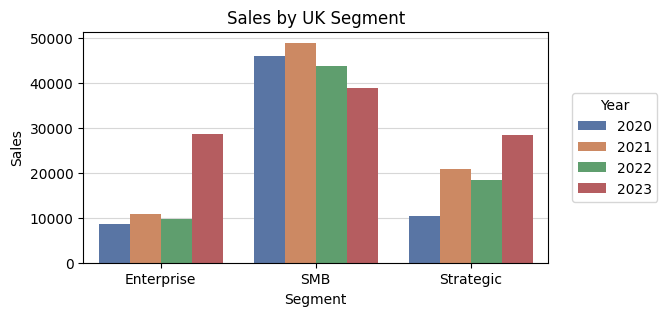

In [195]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'United Kingdom'], x = 'Segment', y = 'Sales', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Sales by UK Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: walaupun penjualannya cenderung melemah di segmen SMB andalannya, UK berhasil menutupinya dengan membukukan pertumbuhan pesat di dua segmen lainnya

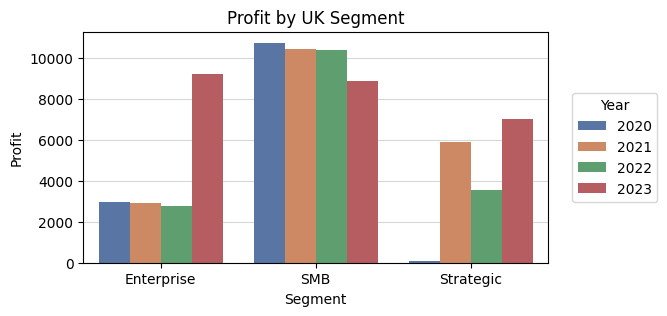

In [196]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'United Kingdom'], x = 'Segment', y = 'Profit', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit by UK Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: UK berhasil membukukan kenaikan profit yang sangat signifikan pada segmen enterprise di tahun 2023 hingga melewati segmen SMB yang selama ini mendominasi

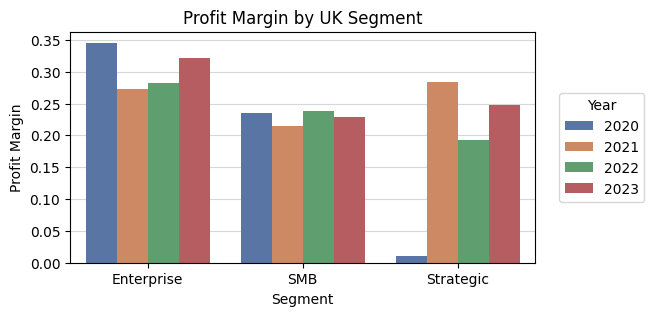

In [197]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'United Kingdom'], x = 'Segment', y = 'Profit Margin', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit Margin by UK Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: UK juga berhasil mempertahankan profit margin di kisaran 20% selama tiga tahun terakhir di semua segmen

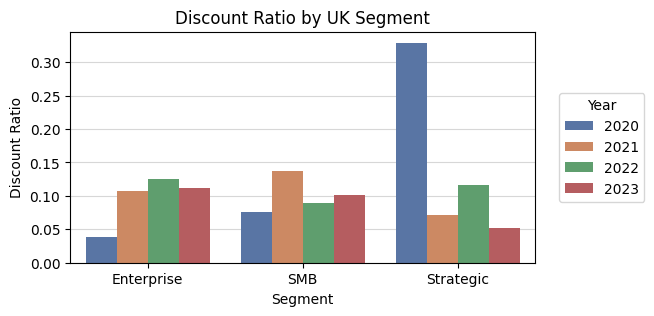

In [198]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'United Kingdom'], x = 'Segment', y = 'Discount Ratio', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Discount Ratio by UK Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: dalam empat tahun terakhir ini, UK secara konsisten mempertahankan discount ratio di bawah 15% dengan hanya satu pengecualian di segmen strategic, itu pun di tahun 2020

### 4.1.4.4. US Segment Review (Global Benchmark)

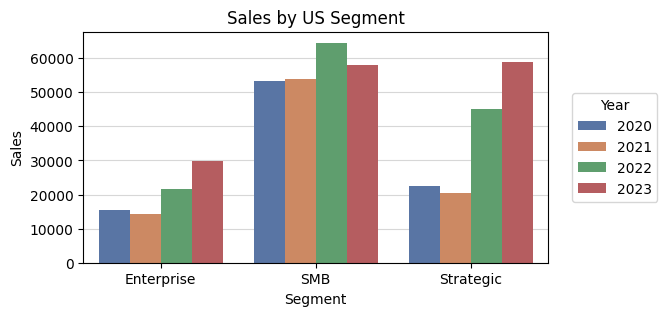

In [199]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'United States'], x = 'Segment', y = 'Sales', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Sales by US Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight : Data US menunjukkan pertumbuhan penjualan yang sangat baik di ketiga segmen, terutama strategic

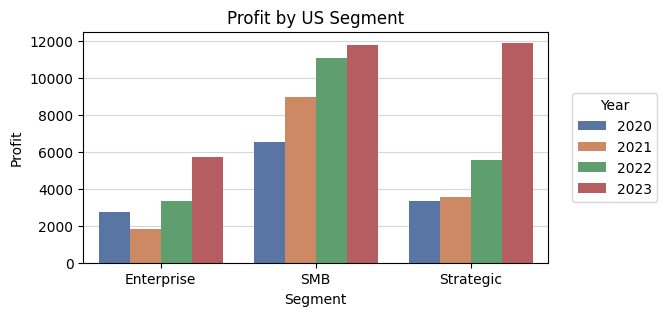

In [200]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'United States'], x = 'Segment', y = 'Profit', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit by US Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: Pertumbuhan sales juga dibarengi dengan peningkatan profit yang signifikan di semua segmen

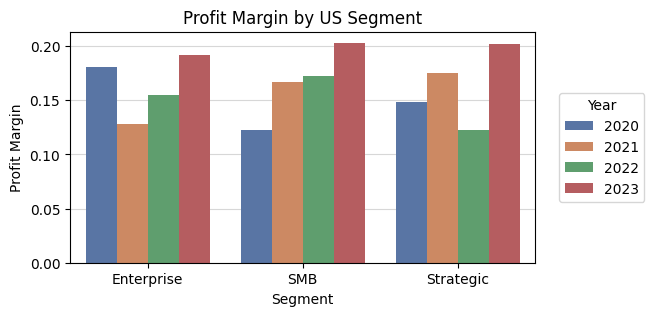

In [201]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'United States'], x = 'Segment', y = 'Profit Margin', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit Margin by US Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: Dalam empat tahun terakhir, US selalu berhasil mencetak profit margin positif di atas 10%, dan bahkan di 2023 telah berhasil mencapai hampir 20% di semua segmen

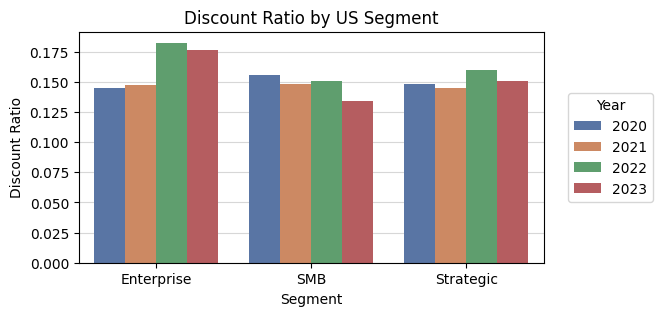

In [202]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_segment[df_segment['Country'] == 'United States'], x = 'Segment', y = 'Discount Ratio', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Discount Ratio by US Segment')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

Insight: US juga sangat disiplin menjaga discount ratio mereka di kisaran level 15%

### 4.1.5. Customer Review

In [203]:
df_customer = df.groupby(['Region', 'Subregion', 'Country', 'Customer'])[['Sales', 'Profit', 'Total Discount']].sum().reset_index()
df_customer['Profit Margin'] = df_customer['Profit'] / df_customer['Sales']
df_customer['Discount Ratio'] = df_customer['Total Discount'] / df_customer['Sales']

### 4.1.5.1. France Customer Review

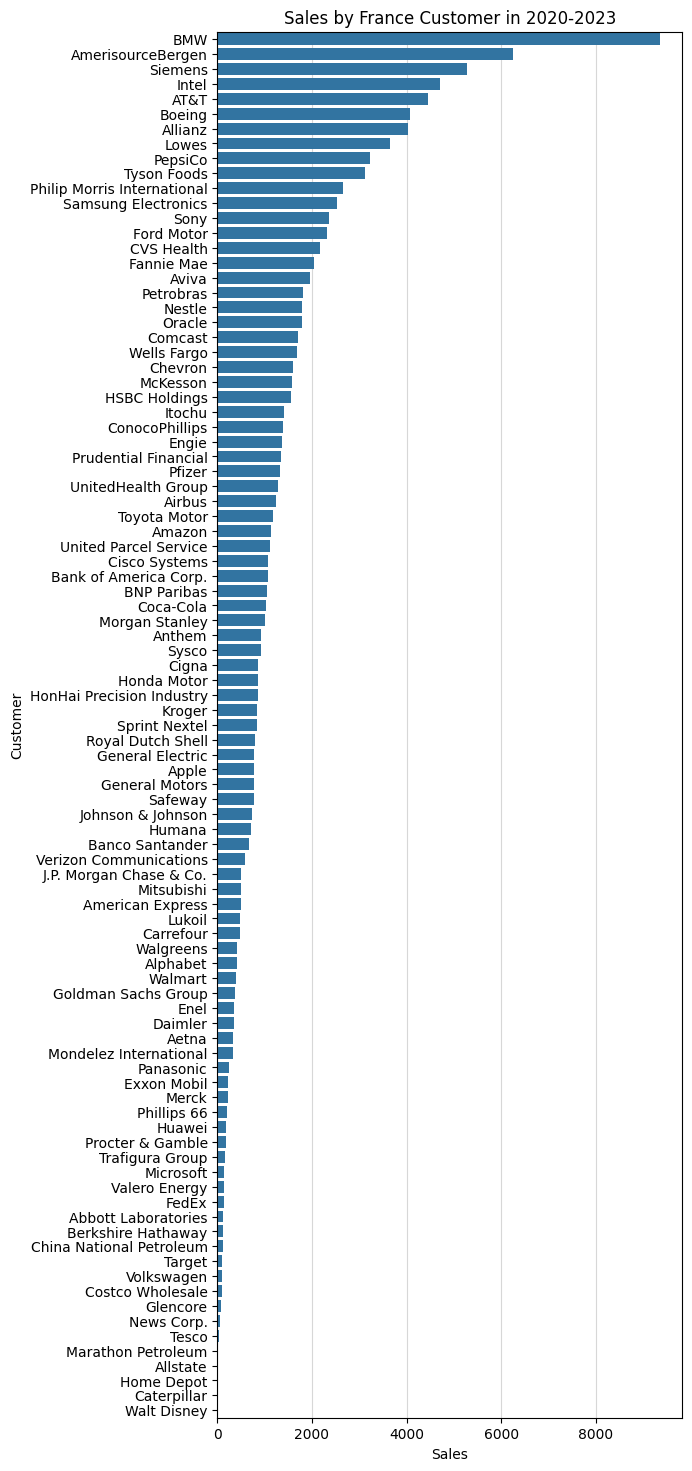

In [204]:
plt.figure(figsize = (6, 18))
sns.barplot(data = df_customer[df_customer['Country'] == 'France'], x = 'Sales', y = 'Customer', order = df_customer[df_customer['Country'] == 'France'].sort_values('Sales', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Sales by France Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

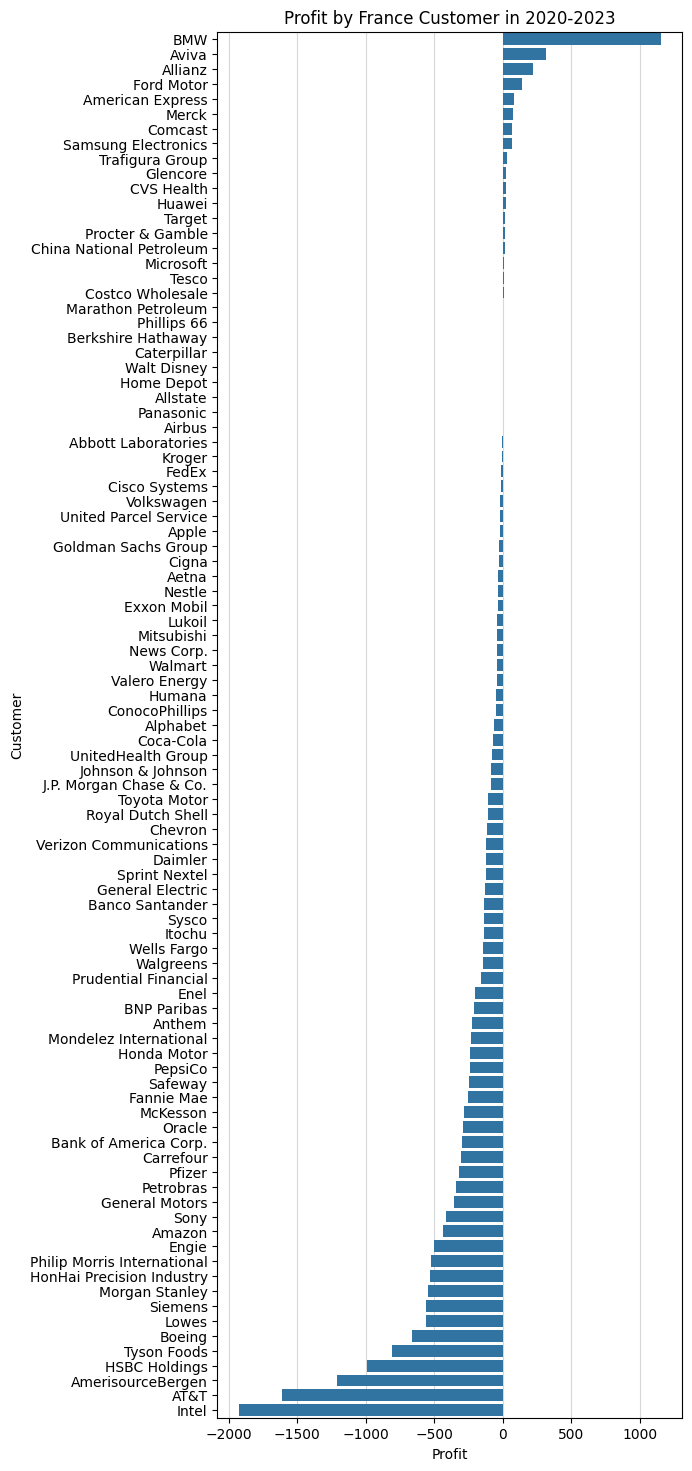

In [205]:
plt.figure(figsize = (6, 18))
sns.barplot(data = df_customer[df_customer['Country'] == 'France'], x = 'Profit', y = 'Customer', order = df_customer[df_customer['Country'] == 'France'].sort_values('Profit', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Profit by France Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

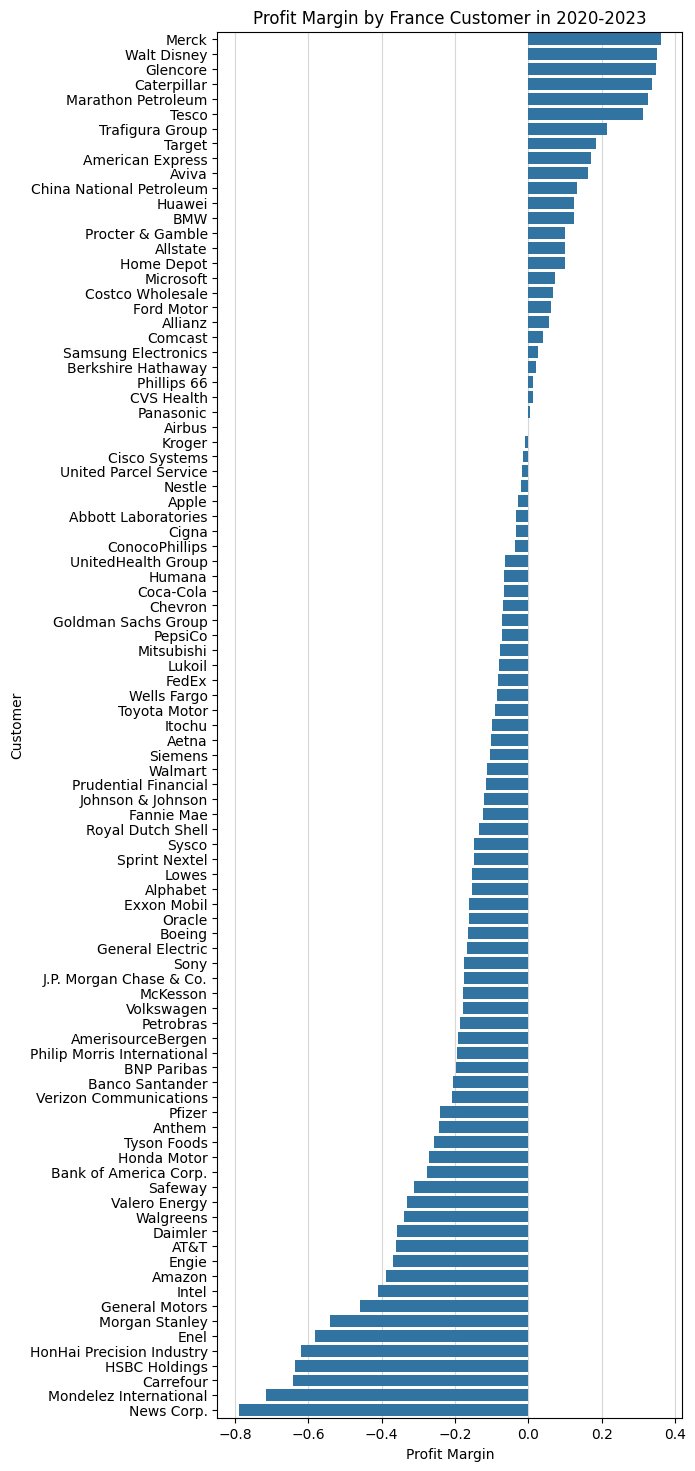

In [206]:
plt.figure(figsize = (6, 18))
sns.barplot(data = df_customer[df_customer['Country'] == 'France'], x = 'Profit Margin', y = 'Customer', order = df_customer[df_customer['Country'] == 'France'].sort_values('Profit Margin', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Profit Margin by France Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

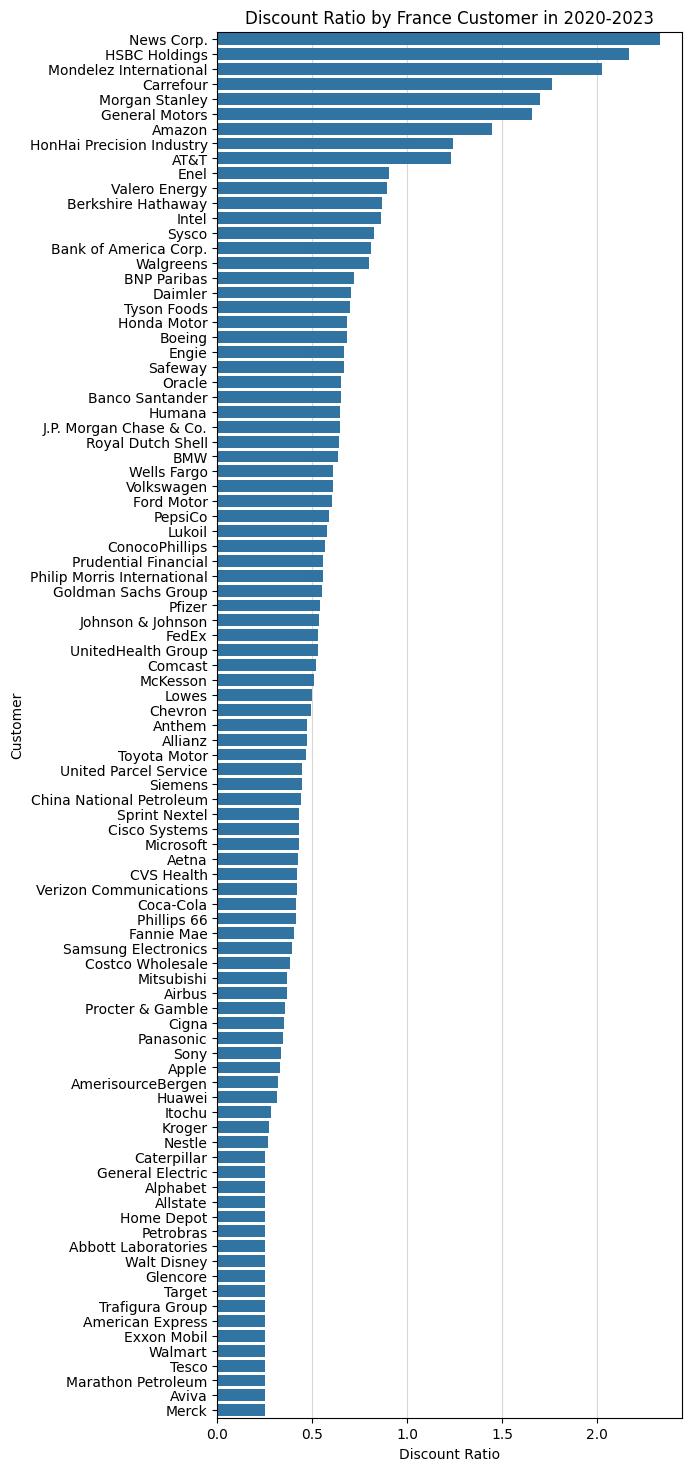

In [207]:
plt.figure(figsize = (6, 18))
sns.barplot(data = df_customer[df_customer['Country'] == 'France'], x = 'Discount Ratio', y = 'Customer', order = df_customer[df_customer['Country'] == 'France'].sort_values('Discount Ratio', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Discount Ratio by France Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

### 4.1.5.2. Spain Customer Review (France Antithesis)

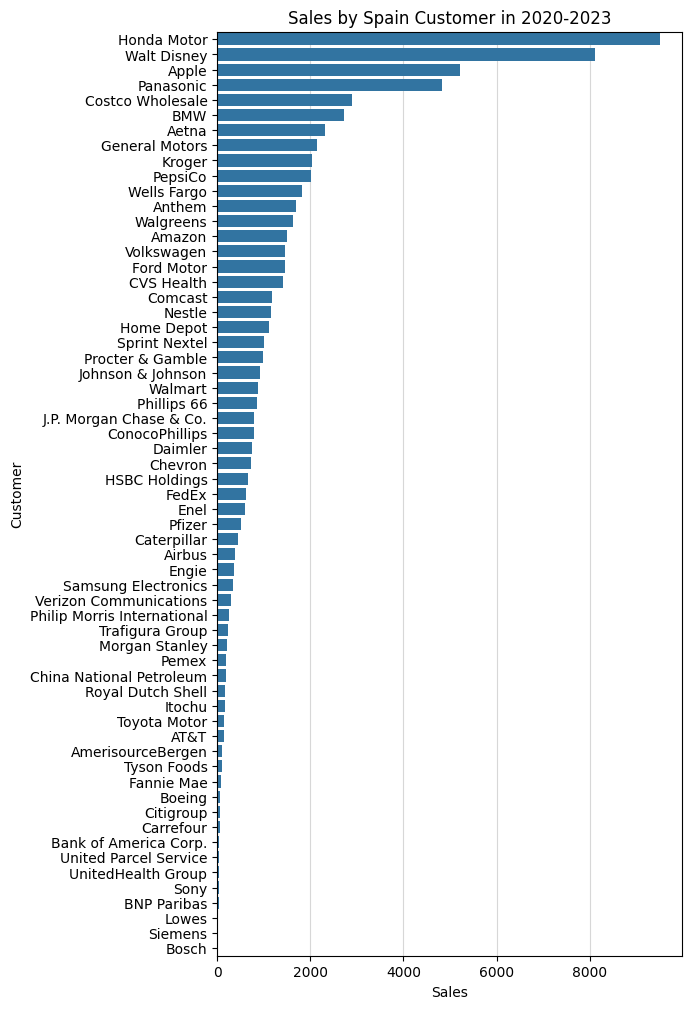

In [208]:
plt.figure(figsize = (6, 12))
sns.barplot(data = df_customer[df_customer['Country'] == 'Spain'], x = 'Sales', y = 'Customer', order = df_customer[df_customer['Country'] == 'Spain'].sort_values('Sales', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Sales by Spain Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

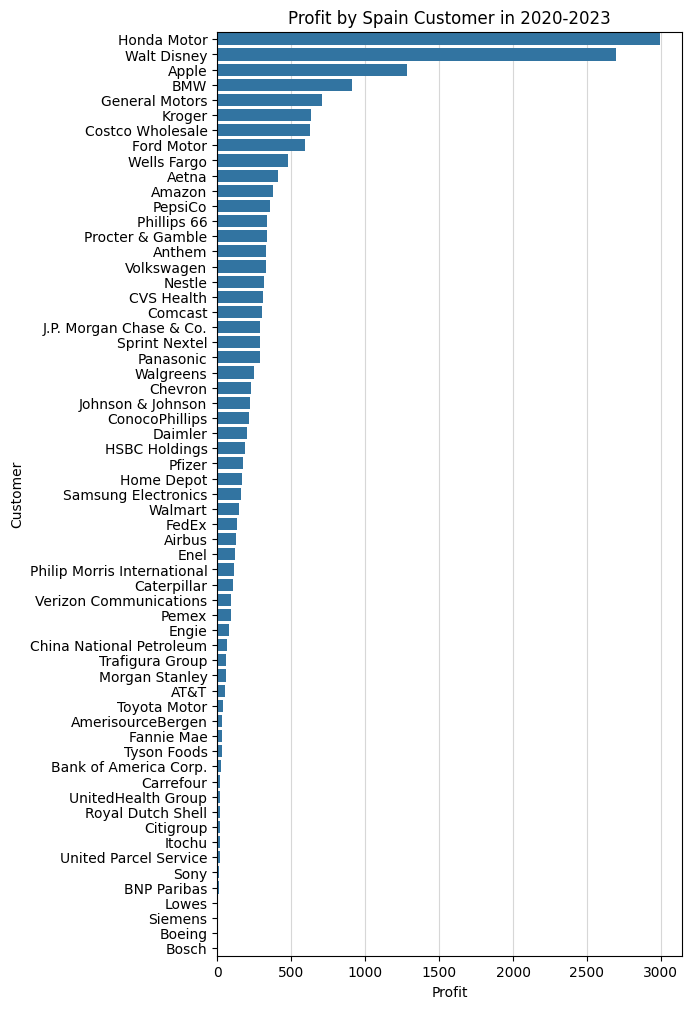

In [209]:
plt.figure(figsize = (6, 12))
sns.barplot(data = df_customer[df_customer['Country'] == 'Spain'], x = 'Profit', y = 'Customer', order = df_customer[df_customer['Country'] == 'Spain'].sort_values('Profit', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Profit by Spain Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

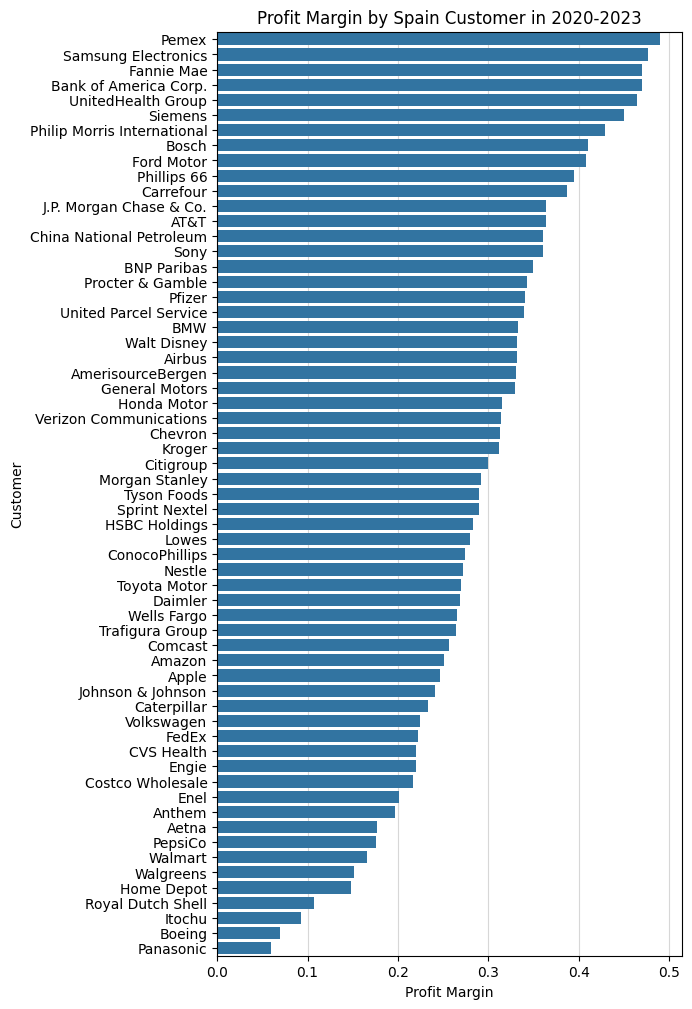

In [210]:
plt.figure(figsize = (6, 12))
sns.barplot(data = df_customer[df_customer['Country'] == 'Spain'], x = 'Profit Margin', y = 'Customer', order = df_customer[df_customer['Country'] == 'Spain'].sort_values('Profit Margin', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Profit Margin by Spain Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

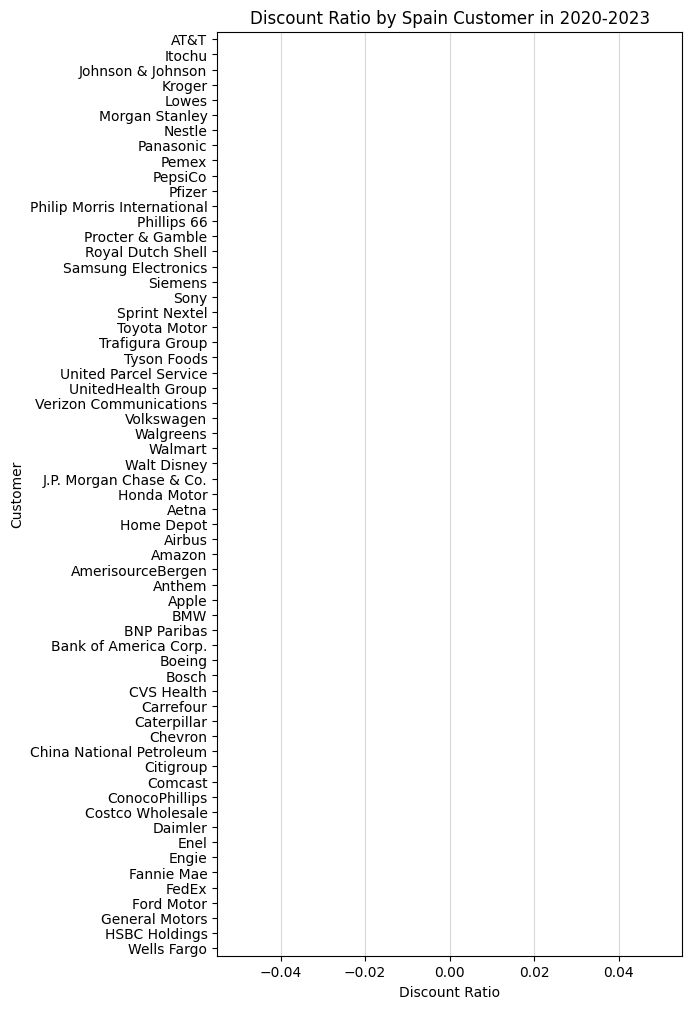

In [211]:
plt.figure(figsize = (6, 12))
sns.barplot(data = df_customer[df_customer['Country'] == 'Spain'], x = 'Discount Ratio', y = 'Customer', order = df_customer[df_customer['Country'] == 'Spain'].sort_values('Discount Ratio', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Discount Ratio by Spain Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

### 4.1.5.3. UK Customer Review (Region Benchmark)

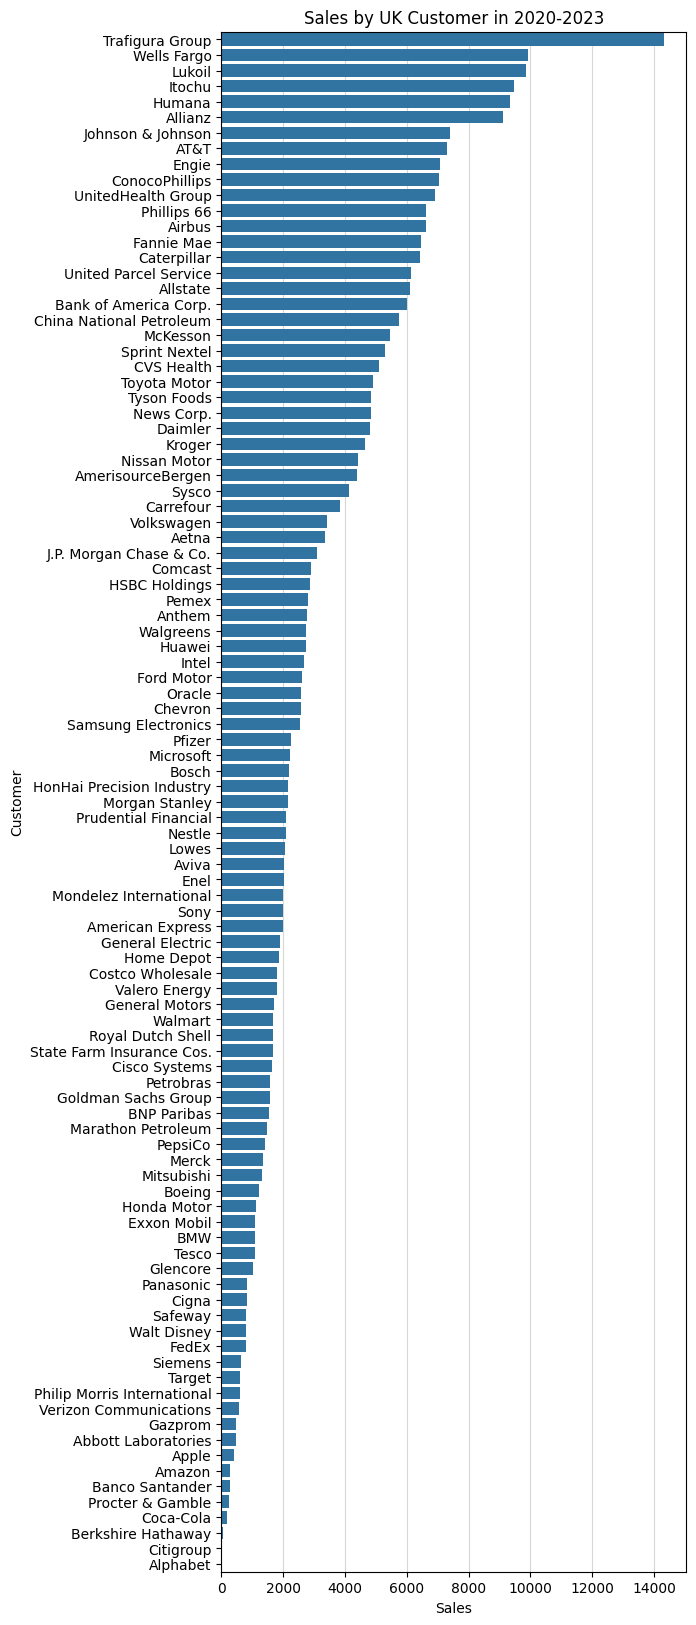

In [212]:
plt.figure(figsize = (6, 20))
sns.barplot(data = df_customer[df_customer['Country'] == 'United Kingdom'], x = 'Sales', y = 'Customer', order = df_customer[df_customer['Country'] == 'United Kingdom'].sort_values('Sales', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Sales by UK Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

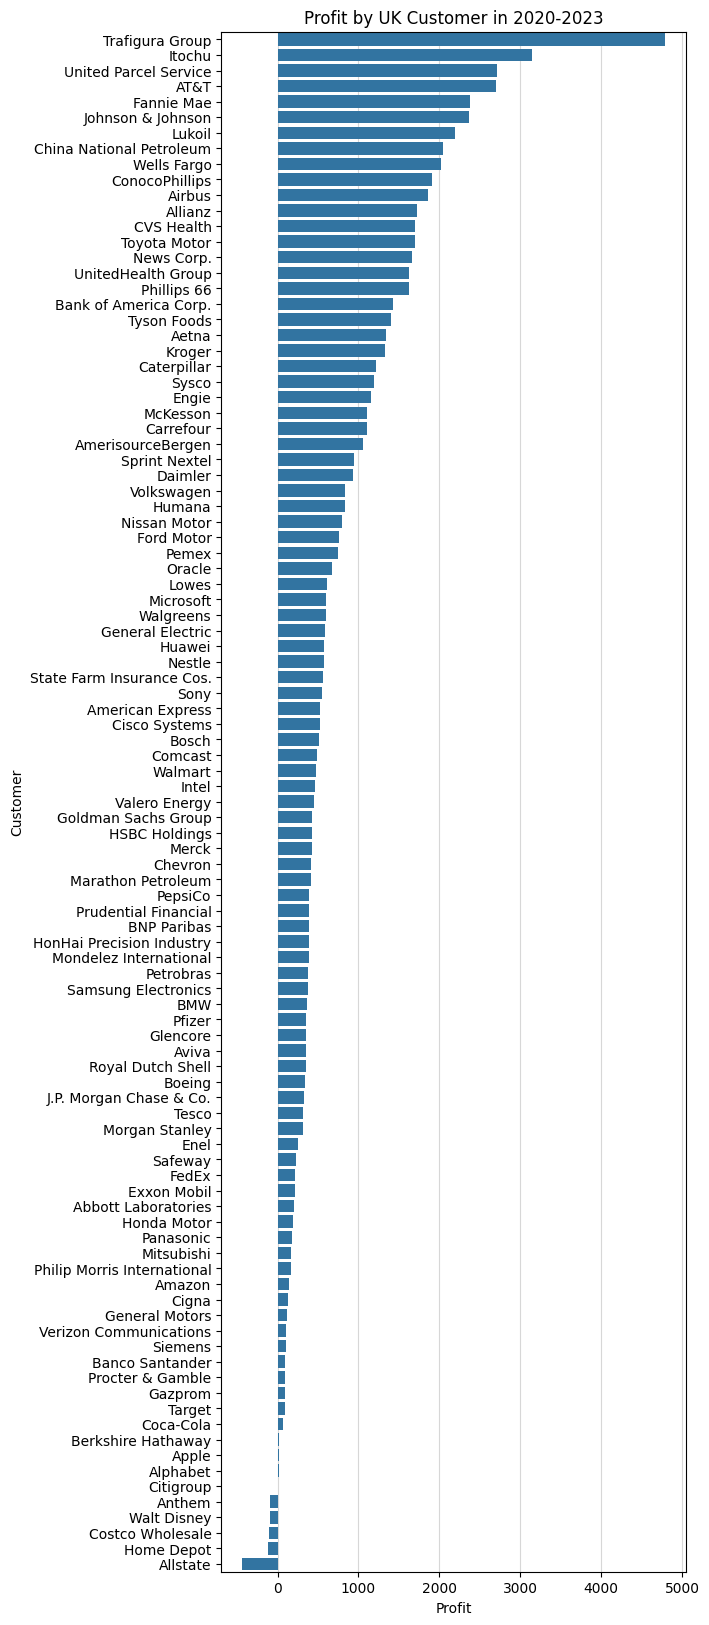

In [213]:
plt.figure(figsize = (6, 20))
sns.barplot(data = df_customer[df_customer['Country'] == 'United Kingdom'], x = 'Profit', y = 'Customer', order = df_customer[df_customer['Country'] == 'United Kingdom'].sort_values('Profit', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Profit by UK Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

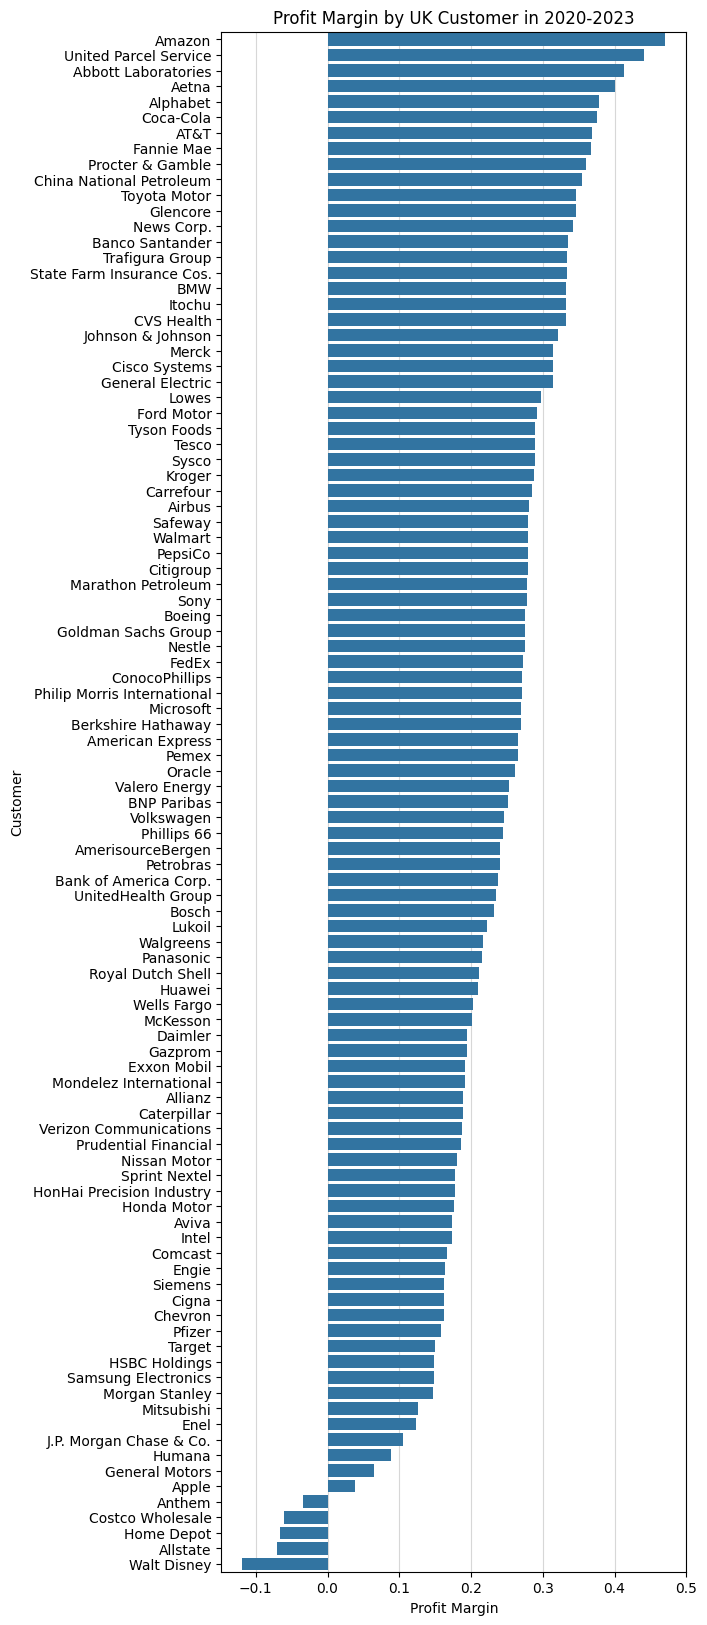

In [214]:
plt.figure(figsize = (6, 20))
sns.barplot(data = df_customer[df_customer['Country'] == 'United Kingdom'], x = 'Profit Margin', y = 'Customer', order = df_customer[df_customer['Country'] == 'United Kingdom'].sort_values('Profit Margin', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Profit Margin by UK Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

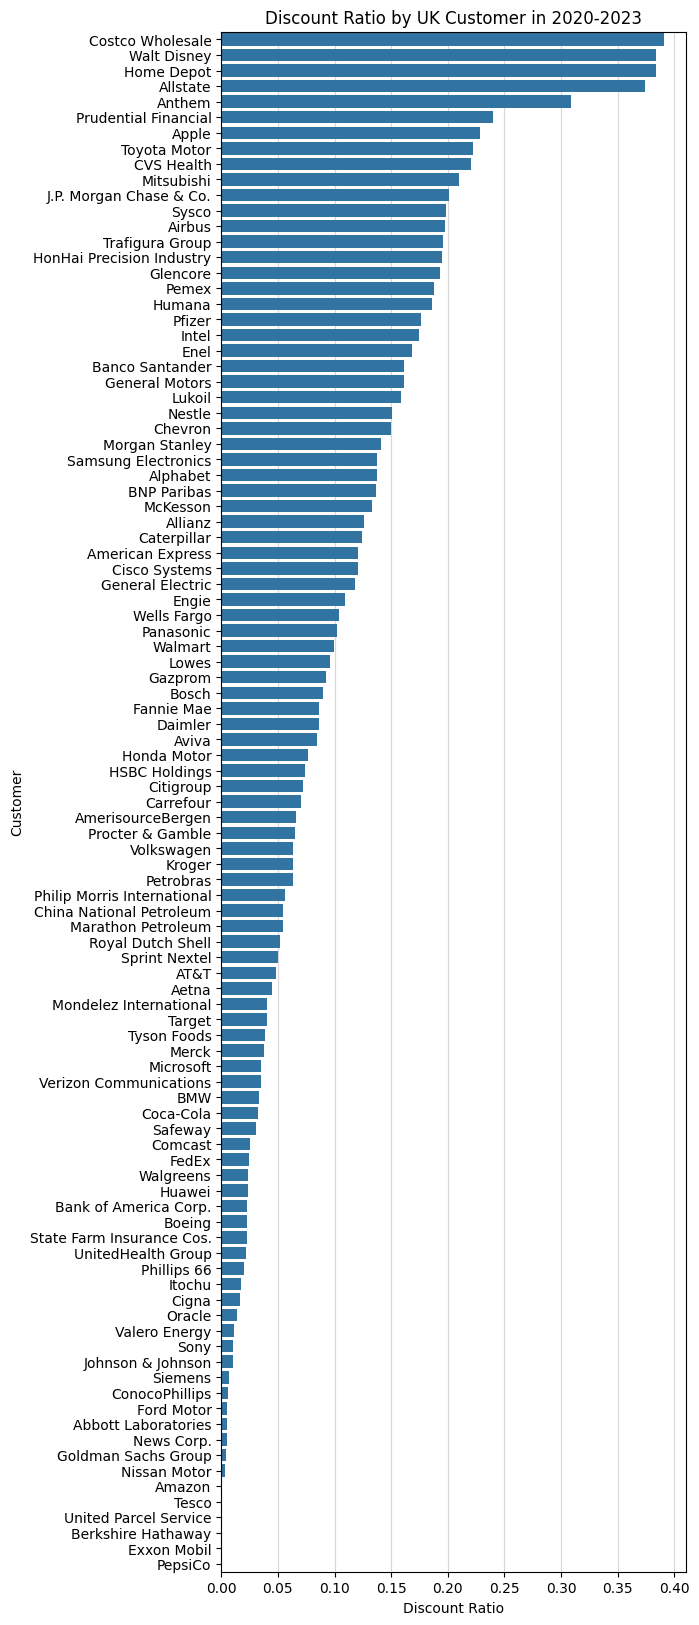

In [215]:
plt.figure(figsize = (6, 20))
sns.barplot(data = df_customer[df_customer['Country'] == 'United Kingdom'], x = 'Discount Ratio', y = 'Customer', order = df_customer[df_customer['Country'] == 'United Kingdom'].sort_values('Discount Ratio', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Discount Ratio by UK Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

### 4.1.5.4. US Customer Review (Global Benchmark)

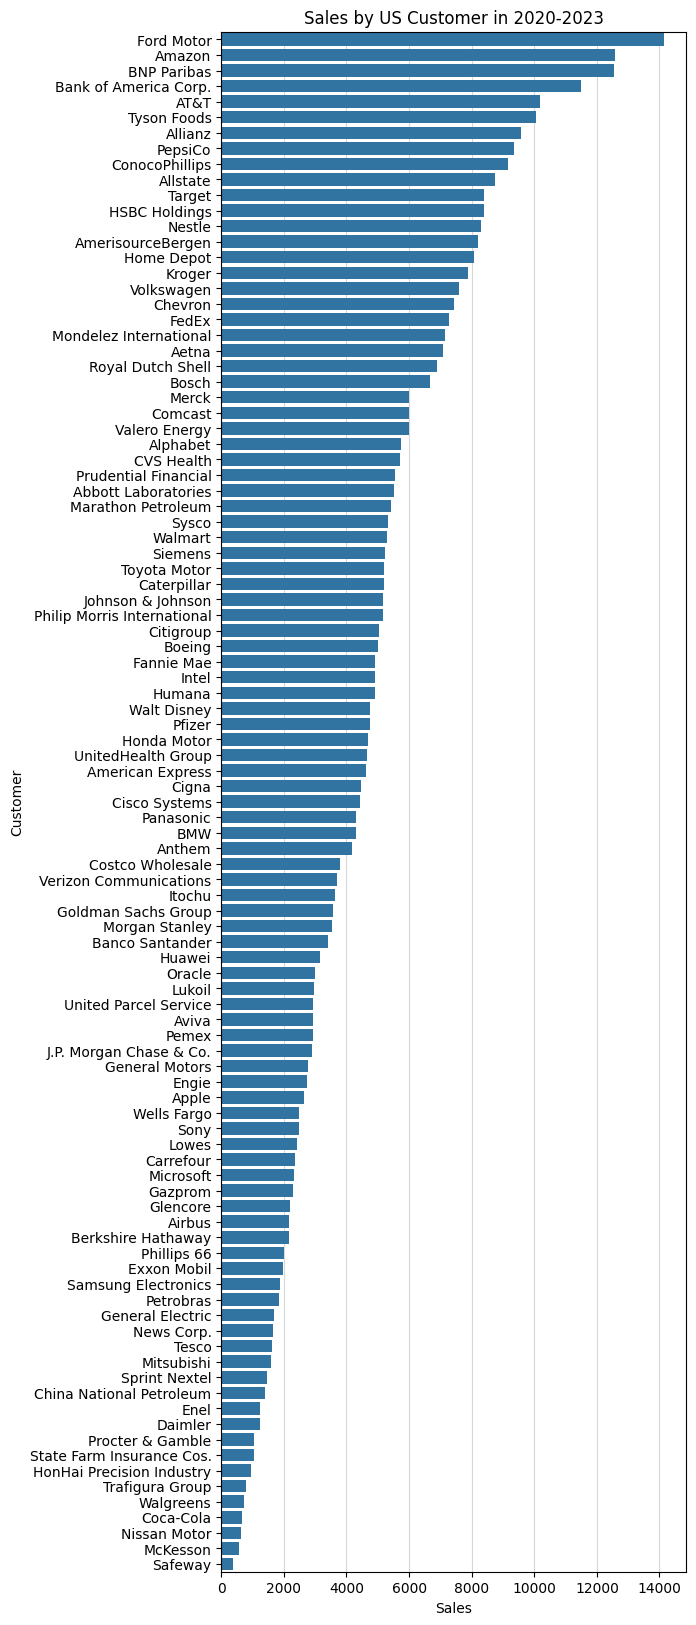

In [216]:
plt.figure(figsize = (6, 20))
sns.barplot(data = df_customer[df_customer['Country'] == 'United States'], x = 'Sales', y = 'Customer', order = df_customer[df_customer['Country'] == 'United States'].sort_values('Sales', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Sales by US Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

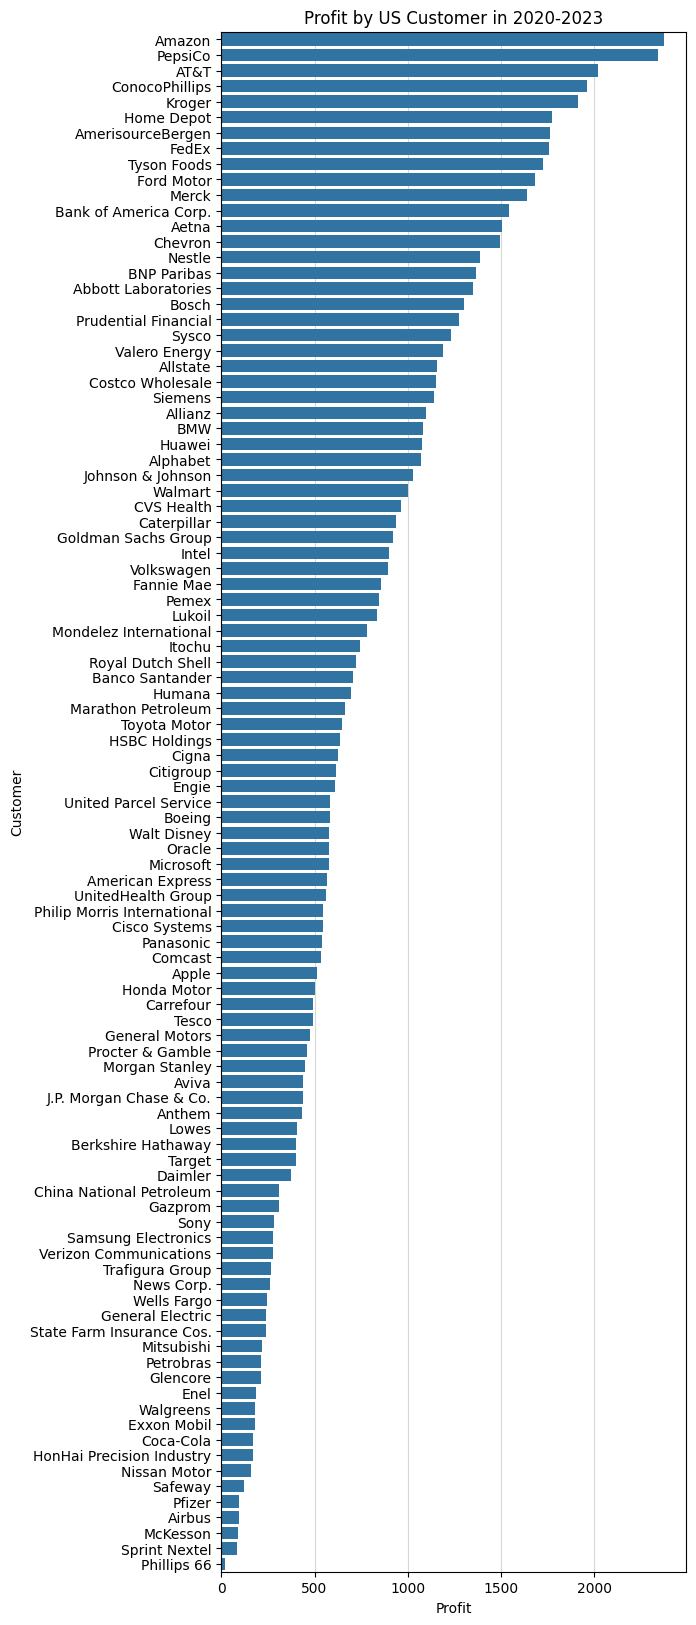

In [217]:
plt.figure(figsize = (6, 20))
sns.barplot(data = df_customer[df_customer['Country'] == 'United States'], x = 'Profit', y = 'Customer', order = df_customer[df_customer['Country'] == 'United States'].sort_values('Profit', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Profit by US Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

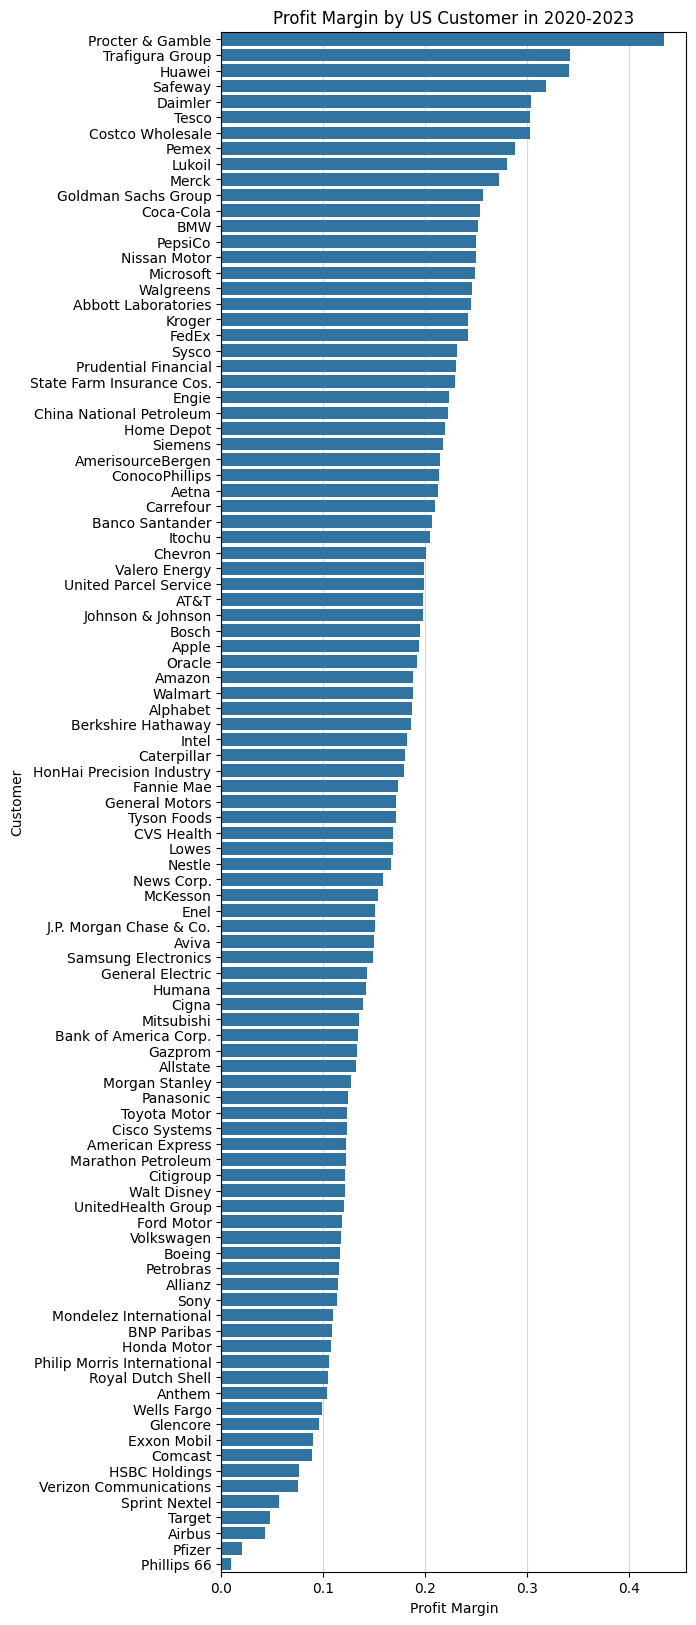

In [218]:
plt.figure(figsize = (6, 20))
sns.barplot(data = df_customer[df_customer['Country'] == 'United States'], x = 'Profit Margin', y = 'Customer', order = df_customer[df_customer['Country'] == 'United States'].sort_values('Profit Margin', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Profit Margin by US Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

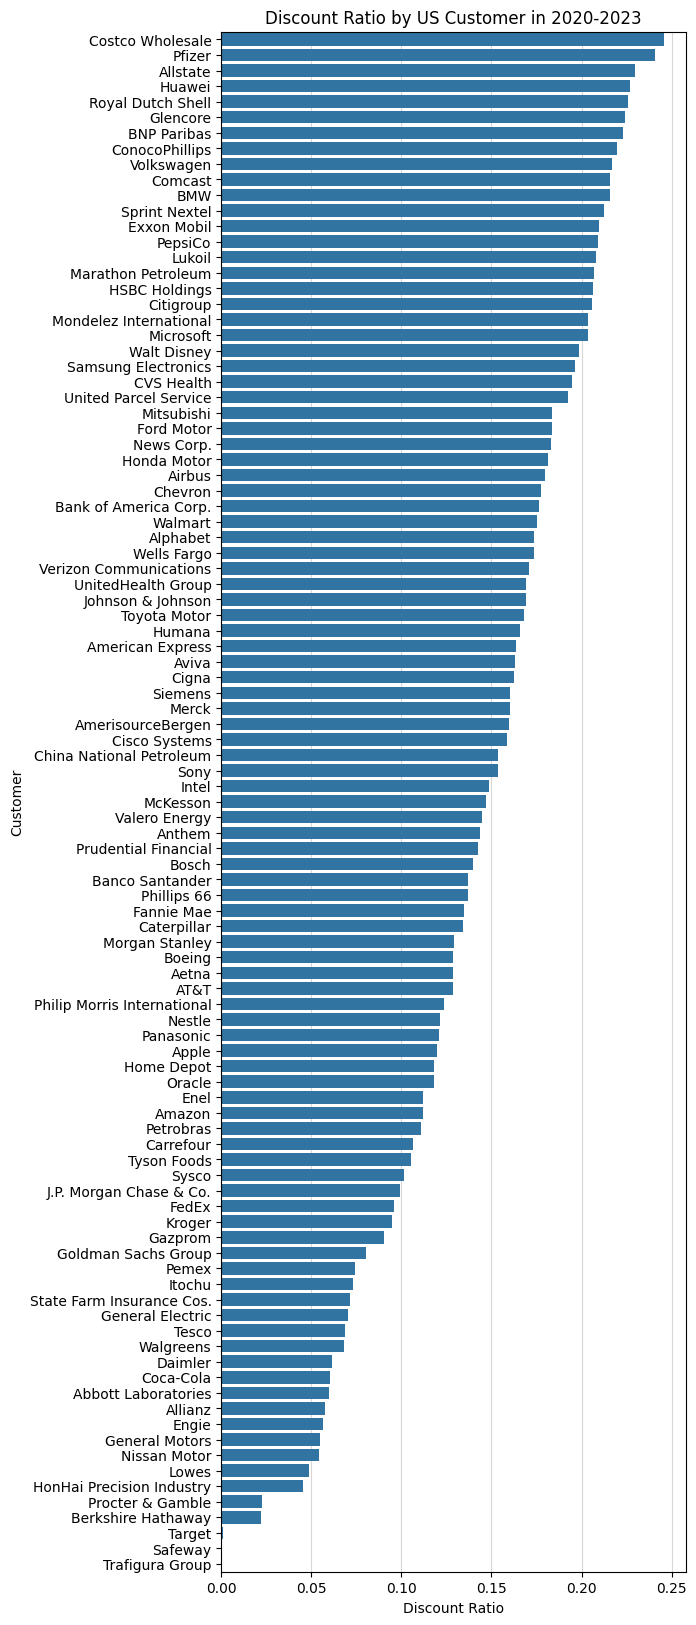

In [219]:
plt.figure(figsize = (6, 20))
sns.barplot(data = df_customer[df_customer['Country'] == 'United States'], x = 'Discount Ratio', y = 'Customer', order = df_customer[df_customer['Country'] == 'United States'].sort_values('Discount Ratio', ascending = False)['Customer'], errorbar = None, zorder = 2)
plt.title('Discount Ratio by US Customer in 2020-2023')
plt.grid(axis='x', alpha = 0.5, zorder = 1)
plt.show()

### 4.1.6. Compared Country Summary

In [220]:
df_country1 = df.groupby(['Region', 'Subregion', 'Country', 'Order Year'])[['Sales', 'Profit', 'Total Discount']].sum().reset_index()
df_country1['Profit Margin'] = df_country1['Profit'] / df_country1['Sales']
df_country1['Discount Ratio'] = df_country1['Total Discount'] / df_country1['Sales']

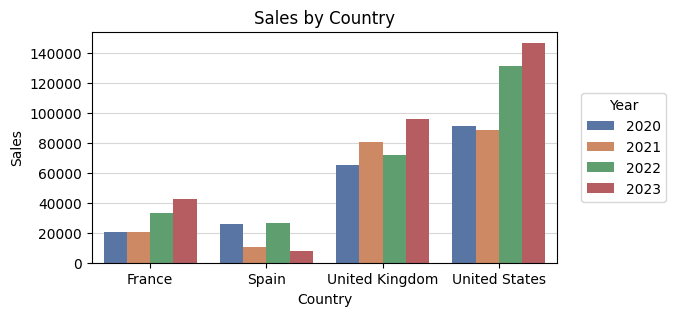

In [221]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_country1[(df_country1['Country'] == 'France') | (df_country1['Country'] == 'Spain') | (df_country1['Country'] == 'United Kingdom') | (df_country1['Country'] == 'United States')].sort_values('Country'), x = 'Country', y = 'Sales', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Sales by Country')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

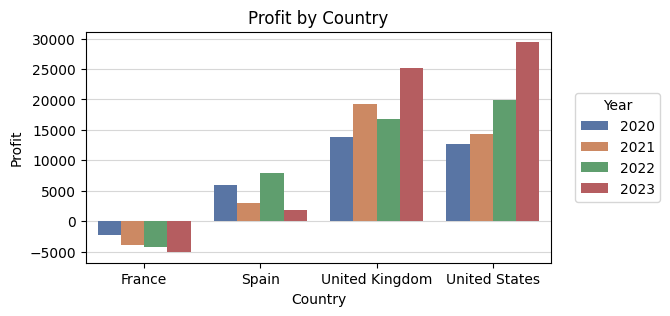

In [222]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_country1[(df_country1['Country'] == 'France') | (df_country1['Country'] == 'Spain') | (df_country1['Country'] == 'United Kingdom') | (df_country1['Country'] == 'United States')].sort_values('Country'), x = 'Country', y = 'Profit', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit by Country')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

In [223]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_country1[(df_country1['Country'] == 'France') | (df_country1['Country'] == 'Spain') | (df_country1['Country'] == 'United Kingdom') | (df_country1['Country'] == 'United States')].sort_values('Country'), x = 'Country', y = 'Profit Margin', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Profit Margin by Country')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

In [224]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df_country1[(df_country1['Country'] == 'France') | (df_country1['Country'] == 'Spain') | (df_country1['Country'] == 'United Kingdom') | (df_country1['Country'] == 'United States')].sort_values('Country'), x = 'Country', y = 'Discount Ratio', hue = 'Order Year', palette = 'deep', errorbar = None, zorder = 2)
plt.title('Discount Ratio by Country')
plt.legend(loc = 'center right', title = 'Year', bbox_to_anchor = (1.25, 0.5))
plt.grid(axis='y', alpha = 0.5, zorder = 1)
plt.show()

### 4.2. RFM Analysis for EU-West Country

RFM analysis ini bertujuan untuk memetakan customer supaya manajemen mendapatkan gambaran seberapa penting suatu customer berdasarkan tingkat recency (kebaruan), frequency (keseringan), dan monetary (nilai uang) transaksi yang dilakukan.

### 4.2.1. Recency Calculation

Recency dalam hari dihitung dari tanggal terakhir periode penilaian (dalam hal ini 31 Desember 2023) dikurangi tanggal transaksi terakhir.

In [225]:
df_recency = df[df['Subregion'] == 'EU-WEST'].groupby('Customer', as_index = False)['Order Date'].max()
df_recency.columns = ['Customer', 'Last Order Date']
df_recency['Recency'] = df_recency['Last Order Date'].apply(lambda x: (datetime(2023, 12, 31) - x).days)
df_recency.head()

Customer Last Order Date  Recency
0                 AT&T      2023-11-20       41
1  Abbott Laboratories      2023-12-19       12
2                Aetna      2023-11-20       41
3               Airbus      2023-12-04       27
4              Allianz      2023-12-23        8

### 4.2.2. Frequency Calculation

Frequancy adalah jumlah order selama periode penilaian.

In [226]:
df_frequency = df[df['Subregion'] == 'EU-WEST'].groupby('Customer', as_index = False)['Order Date'].count()
df_frequency.columns = ['Customer', 'Frequency']
df_frequency.head()

Customer  Frequency
0                 AT&T         29
1  Abbott Laboratories          3
2                Aetna         24
3               Airbus         26
4              Allianz         31

### 4.2.3. Monetary Calculation

Monetary adalah total sales selama periode penilaian.

In [227]:
df_monetary = df[df['Subregion'] == 'EU-WEST'].groupby('Customer', as_index = False)['Sales'].sum()
df_monetary.columns = ['Customer', 'Monetary']
df_monetary.head()

Customer  Monetary
0                 AT&T  5027.054
1  Abbott Laboratories   128.064
2                Aetna  3192.508
3               Airbus  6154.774
4              Allianz  5600.621

### 4.2.4. Merging

Setelah ketiganya selesai dinilai, maka kolomnya digabungkan ke satu dataframe

In [228]:
df_rfm = df_recency.merge(df_frequency, on = 'Customer').merge(df_monetary, on = 'Customer').drop(columns='Last Order Date')
df_rfm.head()

Customer  Recency  Frequency  Monetary
0                 AT&T       41         29  5027.054
1  Abbott Laboratories       12          3   128.064
2                Aetna       41         24  3192.508
3               Airbus       27         26  6154.774
4              Allianz        8         31  5600.621

### 4.2.5. Ranking & Normalizing

Lalu nilai tersebut dirangking dan dinormalisasi supaya rangking tertinggi adalah 100

In [229]:
df_rfm['R Rank'] = df_rfm['Recency'].rank(ascending = False)
df_rfm['F Rank'] = df_rfm['Frequency'].rank(ascending = True)
df_rfm['M Rank'] = df_rfm['Monetary'].rank(ascending = True)
df_rfm.head()

Customer  Recency  Frequency  Monetary  R Rank  F Rank  M Rank
0                 AT&T       41         29  5027.054    62.5    91.5    79.0
1  Abbott Laboratories       12          3   128.064    92.0     4.5     3.0
2                Aetna       41         24  3192.508    62.5    80.5    50.0
3               Airbus       27         26  6154.774    76.0    85.0    88.0
4              Allianz        8         31  5600.621    94.5    95.0    83.0

In [230]:
df_rfm['R Rank (Normalized)'] = (df_rfm['R Rank'] / df_rfm['R Rank'].max()) * 100
df_rfm['F Rank (Normalized)'] = (df_rfm['F Rank'] / df_rfm['F Rank'].max()) * 100
df_rfm['M Rank (Normalized)'] = (df_rfm['M Rank'] / df_rfm['M Rank'].max()) * 100
df_rfm.drop(columns = ['R Rank', 'F Rank', 'M Rank'], inplace = True)
df_rfm.head()

Customer  Recency  Frequency  Monetary  R Rank (Normalized)  \
0                 AT&T       41         29  5027.054            63.131313   
1  Abbott Laboratories       12          3   128.064            92.929293   
2                Aetna       41         24  3192.508            63.131313   
3               Airbus       27         26  6154.774            76.767677   
4              Allianz        8         31  5600.621            95.454545   

   F Rank (Normalized)  M Rank (Normalized)  
0            92.424242            79.797980  
1             4.545455             3.030303  
2            81.313131            50.505051  
3            85.858586            88.888889  
4            95.959596            83.838384

### 4.2.6. Scoring & Rating

Angka rangking tersebut kita scale down dengan mengalikan 0.05 sehingga score tertingginya adalah 5. Kemudian score R, F, dan M dikalikan lagi dengan bobotnya masing-masing untuk menghasilkan RFM score.

Pembobotan R = 20%, F = 30%, dan M = 50%, diberikan atas dasar pertimbangan di mana total sales lebih penting dari jumlah order dan jumlah order lebih penting dari kebaruan transaksi. 

In [231]:
rfm_scale = 0.05
r_weight = 0.2
f_weight = 0.3
m_weight = 0.5

df_rfm['R Score'] = df_rfm['R Rank (Normalized)'] * rfm_scale
df_rfm['F Score'] = df_rfm['F Rank (Normalized)'] * rfm_scale
df_rfm['M Score'] = df_rfm['M Rank (Normalized)'] * rfm_scale

df_rfm['RFM Score'] = df_rfm['R Score'] * r_weight + df_rfm['F Score'] * f_weight + df_rfm['M Score'] * m_weight
df_rfm = df_rfm.round(1)
df_rfm[['Customer', 'R Score', 'F Score', 'M Score', 'RFM Score']].head()

Customer  R Score  F Score  M Score  RFM Score
0                 AT&T      3.2      4.6      4.0        4.0
1  Abbott Laboratories      4.6      0.2      0.2        1.1
2                Aetna      3.2      4.1      2.5        3.1
3               Airbus      3.8      4.3      4.4        4.3
4              Allianz      4.8      4.8      4.2        4.5

Setelah RFM score didapatkan, customer kita bagi ke dalam lima rating, yaitu top, high value, medium value, low value, dan bottom.

In [232]:
top_limit = 4.0
hva_limit = 3.0
mva_limit = 2.0
lva_limit = 1.0

df_rfm['Rating'] = np.where(df_rfm['RFM Score'] > top_limit, 'Top', 
                   np.where(df_rfm['RFM Score'] > hva_limit, 'High Value',
				   np.where(df_rfm['RFM Score'] > mva_limit, 'Medium Value',
				   np.where(df_rfm['RFM Score'] > lva_limit, 'Low Value', 'Bottom'))))

df_rfm[['Customer', 'R Score', 'F Score', 'M Score', 'RFM Score', 'Rating']].head()

Customer  R Score  F Score  M Score  RFM Score      Rating
0                 AT&T      3.2      4.6      4.0        4.0  High Value
1  Abbott Laboratories      4.6      0.2      0.2        1.1   Low Value
2                Aetna      3.2      4.1      2.5        3.1  High Value
3               Airbus      3.8      4.3      4.4        4.3         Top
4              Allianz      4.8      4.8      4.2        4.5         Top

### 4.2.7. Visualizing

In [233]:
plt.figure(figsize = (5, 5))
plt.pie(df_rfm.Rating.value_counts(), labels = df_rfm.Rating.value_counts().index, autopct = '%.0f%%')
plt.title('Customer Rating')
plt.show()

In [234]:
pd.set_option('display.max_rows', 100)

df_rfm[['Customer', 'R Score', 'F Score', 'M Score', 'RFM Score', 'Rating']].sort_values('RFM Score', ascending = False).reset_index(drop = True)

Customer  R Score  F Score  M Score  RFM Score  \
0                        Anthem      4.4      4.9      5.0        4.9   
1             AmerisourceBergen      4.4      4.8      4.9        4.8   
2                       Allianz      4.8      4.8      4.2        4.5   
3                        Pfizer      5.0      3.7      4.5        4.4   
4                       PepsiCo      2.8      5.0      4.7        4.4   
5                           BMW      1.9      4.9      4.9        4.3   
6                        Airbus      3.8      4.3      4.4        4.3   
7                       Siemens      2.3      4.7      4.7        4.2   
8            UnitedHealth Group      4.8      3.5      4.3        4.2   
9                       Chevron      4.1      4.6      3.7        4.1   
10                  BNP Paribas      3.3      3.9      4.6        4.1   
11                   Volkswagen      4.1      4.3      3.9        4.1   
12                    Panasonic      4.9      3.3      4.1        4.0   
13                         AT&T      3.2      4.6      4.0        4.0   
14                   Ford Motor      2.1      4.5      4.4        4.0   
15                       Amazon      4.4      4.4      3.2        3.8   
16                  Tyson Foods      3.9      4.8      3.0        3.7   
17                       Kroger      1.9      3.5      4.5        3.7   
18                Sprint Nextel      4.9      4.5      2.6        3.7   
19                        Apple      0.6      3.9      4.6        3.6   
20                       Nestle      0.9      4.4      4.2        3.6   
21                        FedEx      4.8      2.1      4.1        3.6   
22                       Boeing      3.6      4.1      3.4        3.6   
23                      Walmart      3.4      3.1      3.9        3.6   
24                      Comcast      4.8      3.1      3.5        3.6   
25               ConocoPhillips      4.4      4.2      2.8        3.5   
26                        Intel      1.3      3.5      4.3        3.5   
27                   CVS Health      3.3      4.1      3.1        3.5   
28                  Walt Disney      0.5      3.3      4.8        3.5   
29                        Sysco      2.7      3.7      3.6        3.4   
30                       Itochu      1.5      3.7      4.0        3.4   
31                  Honda Motor      3.8      0.8      4.8        3.4   
32             American Express      2.7      3.1      3.8        3.4   
33  Philip Morris International      3.2      3.9      3.1        3.3   
34                  Phillips 66      4.5      1.9      3.7        3.3   
35                        Lowes      3.5      2.3      3.8        3.3   
36                 Toyota Motor      3.9      2.7      3.2        3.2   
37                        Aetna      3.2      4.1      2.5        3.1   
38                       Lukoil      3.7      2.3      3.0        3.0   
39       Verizon Communications      4.0      2.9      2.7        3.0   
40              Trafigura Group      2.5      2.7      3.3        3.0   
41                         Sony      1.2      3.3      3.5        3.0   
42               Morgan Stanley      3.8      3.9      2.0        2.9   
43          Samsung Electronics      1.7      2.9      3.4        2.9   
44                  Wells Fargo      1.4      2.5      3.6        2.9   
45     China National Petroleum      3.1      4.3      1.9        2.9   
46                         Enel      1.0      4.1      2.6        2.7   
47                    Carrefour      1.3      3.3      2.9        2.7   
48            Royal Dutch Shell      0.8      3.1      3.3        2.7   
49          Goldman Sachs Group      4.2      2.3      2.2        2.7   
50                        Aviva      1.6      3.3      2.8        2.7   
51        Bank of America Corp.      2.9      2.7      2.4        2.6   
52                      Daimler      3.1      3.3      2.0        2.6   
53                    Walgreens      4.2      2.2      2.2        2.6   
54      

## 5. Conclusion

Setelah melakukan analisa finansial secara bertahap dari level global (region) hingga level negara (segmen) dengan memperbandingkan pergerakan empat indikator utama, yaitu sales, profit, profit margin, dan discount ratio dari tahun ke tahun, kita bisa menyimpulkan bahwa permasalahan utama di perusahaan ini ternyata bukan sesederhana gagalnya beberapa negara dalam mencapai profit yang positif, tetapi lebih dari itu, yaitu **lemahnya leadership dan koordinasi internal di level subregion ke bawah**. 

Ini ditunjukkan dengan adanya perbedaan strategi pricing yang sangat lebar, di mana beberapa negara seperti France sangat agresif untuk mengejar market share dengan mengerek discount ratio setinggi-tingginya dan mengorbankan profit margin hingga negatif selama empat tahun berturut-turut tanpa ada intervensi dari management, baik di level country maupun subregion.

Sementara di sebagian negara lagi justru menjalankan strategi berlawanan, yaitu super konservatif ala Spain di mana mereka hanya cari aman menjaga profit margin dengan kebijakan zero discount ratio. Ketidakberanian negara-negara ini dalam mengambil resiko telah dibayar dengan hilangnya market share yang mungkin akan butuh waktu lebih lama untuk memulihkannya daripada sekedar mengembalikan profitabilitas. Dan sama seperti France cs, subregion/country manager sepertinya tidak melakukan tindakan apapun untuk mencegah atau menetralisir dampak yang ditimbulkan.

Analisa ini dibatasi pada region EMEA, subregion EU-West, country France dan Spain, karena keunikannya di mana negara-negara di subregion ini sangat homogen, semuanya negara maju, secara ekonomi tergabung ke dalam Uni Eropa dengan satu mata uang Euro, dan secara pertahanan tergabung ke dalam NATO. Dengan metode yang sama, analisa cepat juga telah dilakukan pada region/subregion/country lainnya, dan hasilnya secara relatif mendukung kesimpulan di atas.

## 6. Recommendations

1. Hasil benchmarking dengan dua negara best practice (sales terbesar, profit tertinggi) UK dan US menunjukkan bahwa **discount ratio yang sehat ada di kisaran 10-15%**, sehingga negara-negara yang agresif harus segera memangkas ratio mereka secara bertahap dalam 1-2 tahun ke depan untuk mengembalikan profitabilitas, demikian juga sebaliknya, negara-negara yang konservatif harus mulai aktif mengembangkan market share mereka dengan menawarkan discount rate untuk menarik kembali customer.

2. **Subregion/country manager wajib memonitor discount ratio secara keseluruhan** supaya pada akhir tahun berada di limit yang aman 10-15%, artinya setiap ada customer yang diberikan discount di atas 15%, maka harus ada juga customer lain yang hanya mendapat discount di bawah 10% untuk menyeimbangkannya.

3. **Penentuan batas discount rate maksimal untuk tiap customer bisa menggunakan hasil RFM analysis sebagai acuan**, di mana misalnya top customers bisa mendapatkan discount hingga 30%, high value 25%, medium value 20%, low value 15%, dan bottom 10%. Dengan begitu, hanya customer yang benar-benar prospektif yang berhak atas discount rate yang lebih tinggi. Sekali lagi ini menuntut kedisiplinan dalam pengawasan dan perencanaan discount ratio oleh manager terkait.

4. Untuk menghindari permasalahan ini terulang kembali, maka **di dalam Key Performance Indicator (KPI) seluruh team penjualan termasuk subregion/country manager wajib mencantumkan secara spesifik angka sales dan profit margin yang ditargetkan**, di mana bonus maksimal hanya bisa didapatkan jika keduanya tercapai bersamaan. Langkah ini akan memotivasi team di negara mana pun untuk menerapkan strategi yang sejalan.